# Analisa Sentimen Dari Media Sosial Twitter Tentang Agresivitas Kepada Para Pejabat Di Indonesia Untuk Tahun Keseluruhan (2016 - 2021)

## 1. Import Library & Load Dataset

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report 

In [2]:
data = pd.read_excel("Data Tahun Keseluruhan (2016 - 2021).xlsx")
data.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,"jakartans bego, mending kalo anies, ini agus h...",negatif
1,2016-12-19 19:20:46+00:00,@kaskus : Apa Anies itu dipikir bego sm ahok??...,positif
2,2016-12-09 11:21:17+00:00,Mau debatnya klo bertempat di Petamburan kali....,negatif
3,2016-11-24 21:22:09+00:00,"BEGO bngt Si ASU (Anies Sandi Uno) itu, pantes...",positif
4,2016-11-18 17:40:30+00:00,@sam_arif_ kalo orang yg tidak bego dan tidak ...,negatif


In [3]:
# Mengecek tipe data dan juga apakah di dalam DataFrame "data" memiliki nilai NaN/tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  9693 non-null   object
 1   content  9693 non-null   object
 2   label    9693 non-null   object
dtypes: object(3)
memory usage: 227.3+ KB


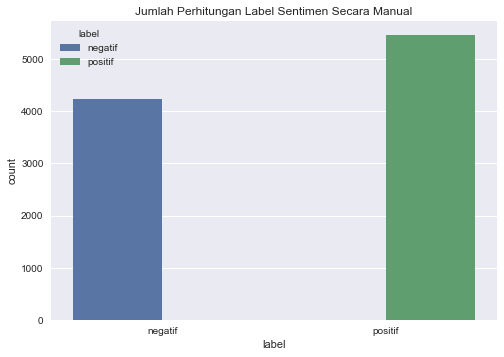

<Figure size 720x720 with 0 Axes>

In [4]:
# Melakukan visualisasi untuk kolom "label"

plt.style.use("seaborn")
plt.title("Jumlah Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="label", hue="label", data=data)
plt.figure(figsize=(10, 10))
plt.show()

In [5]:
# Menghitung sekaligus mengurutkan jumlah label terbanyak berdasarkan tweet
jumlah_content = data.groupby("label").count()["content"].reset_index().sort_values(by="content", ascending=False)
jumlah_content.style.background_gradient(cmap="PuRd")

,label,content
1,positif,5462
0,negatif,4231


Dapat dilihat dari perhitungan diatas, dari 9693 jumlah data netizen twitter dari tahun 2016 - 2021 ketika melakukan tweet tentang topik para pejabat di Indonesia mendapatkan label positif yang sangat tinggi daripada label negatif yang memiliki jumlah sentimen sebanyak 5462 tweet sedangkan label negatif memiliki jumlah sentimen sebanyak 4231.

## 2. Text Preprocessing (Cleansing, Case Folding, Stopwords & Stemming)

### Cleansing

In [6]:
# Menghilangkan dari kalimat-kalimat, simbol-simbol, emoticon yang tidak dibutuhkan selama pengujian pada kolom content
def bersih_text(text):
    text = re.sub(r'[^a-zA-z0-9]',' ', str(text))
    text = re.sub(r'\b\w{1,2}\b','', text)
    text = re.sub(r'\s\s+',' ', text)
    text = re.sub(r'https?:\/\/\S+', '', text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    return text

data["content"] = data["content"].apply(bersih_text)

data.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus Apa Anies itu dipikir bego ahok Jauh l...,positif
2,2016-12-09 11:21:17+00:00,Mau debatnya klo bertempat Petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,BEGO bngt ASU Anies Sandi Uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


In [7]:
# Menghapus spasi pada kolom "label"
data.label = list(map(lambda x: x.strip(), data.label))
data.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus Apa Anies itu dipikir bego ahok Jauh l...,positif
2,2016-12-09 11:21:17+00:00,Mau debatnya klo bertempat Petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,BEGO bngt ASU Anies Sandi Uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


Setelah melakukan proses cleansing teks yaitu menghapus beberapa simbol/karakter-karakter yang tidak dipentingkan dalam kolom content tweet, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil

### Case Folding 

In [8]:
# Mengubah ukuran setiap kalimat yang ada di kolom "content" menjadi huruf kecil
data["content"] = data["content"].str.lower()

data.head()

,tanggal,content,label
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata.

### Tokenizing

In [9]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data["content_tokenizing"] = data["content"].apply(tokennization)
data.head()

,tanggal,content,label,content_tokenizing
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a..."
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,..."
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka..."
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant..."
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid..."


Setelah melakukan tahapan tokenisasi, selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan mengambil kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Proses stopwords saya lakukan dengan mengambil nilai-nilai yang ada diatas yang sudah ditentukan oleh library Sastrawi. Kata-kata diatas boleh digunakan secara keseluruhan/diambil hanya beberapa saja.

In [11]:
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "untuk", "pada", "ke", "antara", "dua", "ia", "seperti", "antara", "dia", "seperti", "jika",
               "tidak", "oleh", "saat", "harus", "sementara", "mereka", "sudah", "terhadap", "sehingga",
               "secara", "agar", "lain", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada",
               "sekitar", "serta", "di", "dari", "telah", "sebagai", "masih", 'setidaknya', "sesuatu", "pasti", 
               "saja", "toh", "ya", "walau", "hal", "bahwa", "atau", "hanya", "ada", "mereka", "agar", "lain", 
               "anda", "begitu", "yaitu", "yakni", "itulah", "demi", "dimana", "pula", "sambil", "sebelum", 
               "sesudah", "guna", "ia", "dengan", "https", "supaya", "kah", "pun", "sampai", "seraya", "seterusnya", 
               "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "nggak", "mari", "nanti", "melainkan", "oh", "ok",
               "sedangkan", "selagi", "seharusnya", "sebetulnya", "setiap", "apakah", "kecuali", "sebab", "selain"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data["content_stopwords"] = data["content_tokenizing"].apply(stopword)

In [13]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data["content_stopwords"] = data["content_stopwords"].apply(stopwords_removal)
data.head()

,tanggal,content,label,content_tokenizing,content_stopwords
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ..."
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]"
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k..."
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a..."
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming

In [14]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "content_stopwords"
for document in data["content_stopwords"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data["content_stemming"] = data["content_stopwords"].swifter.apply(stemming_word)

27782
------------------------
jakartans : jakartans
bego : bego
mending : mending
kalo : kalo
anies : anies
agus : agus
c66jtx7qoz : c66jtx7qoz
kaskus : kaskus
dipikir : pikir
ahok : ahok
loe : loe
hok : hok
debatnya : debat
klo : klo
bertempat : tempat
petamburan : tambur
kali : kali
kalah : kalah
debat : debat
kasih : kasih
kode : kode
teriak2 : teriak2
cemen : cemen
hebat : hebat
swlwyu8q4c : swlwyu8q4c
bngt : bngt
asu : asu
sandi : sandi
uno : uno
pantes : pantes
aja : aja
dipecat : pecat
jkw : jkw
proyek2 : proyek2
foke : foke
proyek : proyek
kkn : kkn
pnbj7r1mjk : pnbj7r1mjk
sam : sam
arif : arif
orang : orang
tolol : tolol
milih : milih
ahy : ahy
percetakanku : cetak
iwanfals : iwanfals
polling : polling
menang : menang
iwan : iwan
fals : fals
dibilang : bilang
pendukung : dukung
dipiara : piara
masukan : masuk
dana : dana
csr : csr
apbd : apbd
anis : anis
swasta : swasta
rngsupzbaj : rngsupzbaj
imanhermawan23 : imanhermawan23
marcel : marcel
prawira : prawira
herilatief : heri

khuhus : khuhus
pemilih : pilih
parah : parah
pakai : pakai
dtsjgdocq6 : dtsjgdocq6
merdekadotcom : merdekadotcom
dasar : dasar
ketinggalan : tinggal
tiru2 : tiru2
langkah : langkah
mega : mega
bner2 : bner2
tukang : tukang
copy : copy
doang : doang
tbayupatti : tbayupatti
kencing : kencing
lurus : lurus
bekas : bekas
pect : pect
otaknya : otak
ed : ed
tirta : tirta
yudh4sampurna : yudh4sampurna
tonywibowo12 : tonywibowo12
zulemo15 : zulemo15
donywenas : donywenas
mlmkabeh : mlmkabeh
fariz1234 : fariz1234
wewenang : wewenang
ektp : ektp
iih : iih
rinjanijb : rinjanijb
pedukung : dukung
wis : wis
wedan : wedan
koplak : koplak
amrik : amrik
fitnah : fitnah
waljamaah : waljamaah
jonru : jonru
fadlizon : fadlizon
fahrihamzah : fahrihamzah
dpp : dpp
halus24 : halus24
ratnaspaet : ratnaspaet
fahiraidris : fahiraidris
gerindra : gerindra
history : history
diatas : atas
rhomaihrama : rhomaihrama
ngibul : ngibul
uda : uda
mimik : mimik
susu : susu
trs : trs
bobo : bobo
gih : gih
bambang34640775

bully : bully
the : the
president : president
because : because
there : there
case : case
hysteris : hysteris
anggota : anggota
dpdri : dpdri
nekat : nekat
merencanakan : rencana
aksimakaralawakilrakyat411 : aksimakaralawakilrakyat411
jngn : jngn
agma : agma
cra2 : cra2
kotor : kotor
lbh : lbh
barokah : barokah
sosmed : sosmed
kuliah : kuliah
ecek : ecek
pas : pas
gagu : gagu
gagap : gagap
ngopijahe : ngopijahe
09 : 09
habibrizieq : habibrizieq
sendok : sendok
almaidah : almaidah
8xllaxga2g : 8xllaxga2g
radioelshinta : radioelshinta
temuan : temu
inteljen : inteljen
rahasia : rahasia
indonesia : indonesia
estiningsihdwi : estiningsihdwi
demokrasi : demokrasi
omongan : omong
ditelan : tel
mujib170472 : mujib170472
ditemui : temu
wapres : wapres
konstitusi : konstitusi
hrsnya : hrsnya
sindotrijayafm : sindotrijayafm
kmi : kmi
bayaran : bayar
suap : suap
kampungan : kampung
tvonenewsdotcom : tvonenewsdotcom
jagan : jagan
radikal : radikal
kurs : kurs
070 : 070
hhh : hhh
nambah : nambah
su

golovkinnn : golovkinnn
senang : senang
komunis : komunis
ngmng : ngmng
drpd : drpd
faham : faham
maunya : mau
jlsrhi7ion : jlsrhi7ion
kekurang : kurang
tegasan : tegas
dyarnikchd : dyarnikchd
royrenaldo1 : royrenaldo1
ehh : ehh
memproses : proses
ancaman : ancam
pembunuhan : bunuh
wajar : wajar
mayoritas : mayoritas
aidi : aidi
suryadarma : suryadarma
daizlaode : daizlaode
jutaan : juta
mendagri : mendagri
ngebantah : ngebantah
pki : pki
ngeletus : ngeletus
usia : usia
nye : nye
kate : kate
tjahtjo : tjahtjo
pdip : pdip
yak : yak
kemnakerri : kemnakerri
gusdur : gusdur
amburadul : amburadul
energi : energi
dihapus : hapus
pokok : pokok
tka : tka
ilegal : ilegal
calonin : calonin
serbuan : serbu
cina : cina
mengganggu : ganggu
biarkan : biar
keutuhan : utuh
ayumakaka : ayumakaka
yakan : yakan
pst : pst
krj : krj
pnya : pnya
ngapain : ngapain
kere : kere
maximvs09 : maximvs09
kesian : kesi
lahirin : lahirin
pro : pro
disandera : sandera
backing : backing
mahkamahagung : mahkamahagung
pl

ggo3y96bd8 : ggo3y96bd8
marjoso71 : marjoso71
vivacoid : vivacoid
plonga : plonga
plongo : plongo
nista : nista
komenin : komenin
nggubris : nggubris
narkoba : narkoba
biayai : biaya
jatuh : jatuh
hina : hina
simbol : simbol
amanogawa09 : amanogawa09
lari : lari
kabur : kabur
sendoknya : sendok
gerakin : gerakin
orng2 : orng2
bebaju : bebaju
putih : putih
nunggangin : nunggangin
tunggangi : tunggang
fahri : fahri
hamzah : hamzah
diinjek : diinjek
hina2 : hina2
smp : smp
blm : blm
lapori : lapor
keterusan : terus
kelana83 : kelana83
boro2 : boro2
daging : daging
arie : arie
edhie : edhie
baskoro : baskoro
ibas : ibas
dilempar : lempar
nusakambangan : nusakambangan
keadilanakandtg : keadilanakandtg
mikirin : mikirin
lapisan : lapis
makannya : makan
amet : amet
av : av
tos : tos
heleh : heleh
tuanarief : tuanarief
smua : smua
sering2 : sering2
gaul : gaul
guorong69 : guorong69
ramadan32401426 : ramadan32401426
rusuh : rusuh
aza : aza
damai : damai
audreyratri : audreyratri
d : d
mafiawasi

hbdr21 : hbdr21
irwank2k2 : irwank2k2
membencimu : benci
kritiklah : kritik
berakal : akal
mencintaimu : cinta
imam : imam
ali : ali
taufan : taufan
alatas : alatas
komentar : komentar
menyedihkan : sedih
rudyey70 : rudyey70
skumar176 : skumar176
uping : uping
maki2 : maki2
penduduk : duduk
memakai : pakai
asing : asing
nasionaliskah : nasionalis
ssuatu : ssuatu
alamat : alamat
bibit : bibit
pertikaian : tikai
didengar : dengar
didienazhar : didienazhar
pulang : pulang
dkzznbz7ur : dkzznbz7ur
abislah : abis
kedepan : depan
prof : prof
strategi : strategi
berlin : lin
hassan : hassan
ribu : ribu
ntar : ntar
rakyatmu : rakyat
jelata : jelata
buruh : buruh
srcbnsyfbh : srcbnsyfbh
sehat : sehat
menjaga : jaga
sumbu : sumbu
pendek : pendek
membunuh : bunuh
halal : halal
bunuh : bunuh
kampang : kampang
nyebelin : nyebelin
0bha6widuu : 0bha6widuu
sayareya : sayareya
diaem : diaem
aparatpun : aparat
bertambah : tambah
mangsamu : mangsa
spo : spo
sek : sek
apek : apek
ganggu : ganggu
tolikara :

6rand : 6rand
don6 : don6
surotoroi : surotoroi
mscendani : mscendani
momentum : momentum
bandungintoleran : bandungintoleran
diproses : proses
makgondut : makgondut
ridwankamil : ridwankamil
tangkap : tangkap
adili : adil
4weyc7gtka : 4weyc7gtka
samapai : samapai
syeitonnnnn : syeitonnnnn
yvktfpfo2s : yvktfpfo2s
412 : 412
malam : malam
romantis : romantis
mengisap : isap
rokok : rokok
lembab : lembab
sugi : sugi
0706 : 0706
rt1ooxs6eo : rt1ooxs6eo
orgnya : orgnya
afnigates : afnigates
fafamangstab : fafamangstab
panitia : panitia
acara : acara
kitaindonesia : kitaindonesia
memalukan : malu
humor : humor
tuan : tuan
sejakarta : sejakarta
datanglah : datang
monas : monas
desember : desember
disangka : sangka
repot2 : repot2
masy : masy
aksi212 : aksi212
bodong : bodong
karinaien : karinaien
tgl : tgl
giliran : gilir
dateng : dateng
bingung : bingung
muji2 : muji2
proamdalrtb : proamdalrtb
kementerianlhk : kementerianlhk
sumatera : sumatera
bajer : bajer
sbnrnya : sbnrnya
sayang : sayang

gewfltxfec : gewfltxfec
krizz39907724 : krizz39907724
ngoceh : ngoceh
bani : bani
cabul : cabul
didik : didik
mabur : mabur
kebanyakan : banyak
jefrinaldi : jefrinaldi
anandasukarlan : anandasukarlan
sukrlala : sukrlala
pidato : pidato
berkarap : karap
koh : koh
disitu : situ
naah : naah
kecewa : kecewa
menterinya : menteri
cebong : cebong
suara : suara
satubkolam : satubkolam
butek : butek
dicekoki : cekok
ngecek : ngecek
kgk : kgk
lipat : lipat
sdbbx8wgxj : sdbbx8wgxj
ayo : ayo
vangke : vangke
nyinyirin : nyinyirin
lahhh : lahhh
y0rbun8fyi : y0rbun8fyi
udin19 : udin19
ferryh19 : ferryh19
wooyyyy : wooyyyy
berpikirk : berpikirk
taon : taon
djarot : djarot
tanggung : tanggung
ush : ush
bagi2 : bagi2
jamban : jamban
fwhhn5k6pg : fwhhn5k6pg
nomer : nomer
tenabang : tenabang
ttp : ttp
menimbulkan : timbul
kemacetan : macet
doel2 : doel2
sisi : sisi
seolah2 : seolah2
disisi : sisi
laen : laen
setiawan87iwan : setiawan87iwan
lilianbih : lilianbih
mastbp : mastbp
siklus : siklus
hidrologi : 

brita : brita
diusir : usir
smpt : smpt
shalt : shalt
jumat : jumat
shalat : shalat
msjd : msjd
wartawan : wartawan
pjabat : pjabat
kunker : kunker
persekusi : persekusi
sajam : sajam
gawat : gawat
asik : asik
comberan : comberan
ngeruk : ngeruk
rutofivevo : rutofivevo
william60118 : william60118
andika : andika
211216 : 211216
arifinpribadi : arifinpribadi
eliya : eliya
mkom : mkom
aldhiraaa : aldhiraaa
playingasvictim : playingasvictim
penistaagama : penistaagama
standar : standar
gurih : gurih
segurih : gurih
mecin : mecin
akuin : akuin
kelompok : kelompok
ngusir : ngusir
balasannya : balas
walkout : walkout
maha : maha
adil : adil
berkerja : kerja
gubenur : gubenur
fs6kzb1qqx : fs6kzb1qqx
naznasir1 : naznasir1
green : green
garden : garden
taonan : taonan
skg : skg
barusan : barusan
oktober : oktober
visi : visi
misi : misi
tercover : tercover
mba : mba
berjalannya : jalan
nzpp46o0ui : nzpp46o0ui
sinyal : sinyal
kepulauan : pulau
seribu : ribu
6d53mrshef : 6d53mrshef
operator : ope

bemoljaya5 : bemoljaya5
am0k4 : am0k4
mallik02 : mallik02
kraengmedicy : kraengmedicy
aidah731103221 : aidah731103221
paijoaryanto : paijoaryanto
manusiabersay4p : manusiabersay4p
gurutua7 : gurutua7
gebuki : gebuk
mca : mca
andrilay007 : andrilay007
nazta08 : nazta08
ndeso : ndeso
chinese : chinese
datanya : data
paxrue5kan : paxrue5kan
asboediono : asboediono
romo : romo
kotak : kotak
memusuhi : musuh
miara : miara
kilas : kilas
ngerangkul : ngerangkul
berhutang : hutang
budi : budi
wakadol2012 : wakadol2012
magusset : magusset
ch : ch
chotimah : chotimah
gobloknya : goblok
naga : naga
keok : keok
lidyasalaunaung : lidyasalaunaung
gussumbogo : gussumbogo
tipikal : tipikal
ngomel2 : ngomel2
voridjer : voridjer
dikasih : kasih
bales2 : bales2
watson : watson
katia : katia
hobi : hobi
muh : muh
zakii : zakii
alergi : alergi
dikritik : kritik
modelnya : model
kebijakannya : bijak
polemik : polemik
bodohnya : bodoh
sandiaga : sandiaga
diutak : diutak
atik : atik
untk : untk
expoloitasi : 

menonjol : tonjol
slama : slama
nothing : nothing
hapus : hapus
lpj : lpj
menyederhanakannya : sederhana
iaophaiupq : iaophaiupq
sekian : sekian
wagabener : wagabener
fatal : fatal
tinggalkan : tinggal
pusing : pusing
peminpin : peminpin
mecat : mecat
diteruskan : terus
taruhan : taruh
ptwn8f51yv : ptwn8f51yv
warganya : warga
rezimnya : rezim
fq1mhaypuv : fq1mhaypuv
sembako : sembako
apkh : apkh
disimpulkn : disimpulkn
rpzjmcztow : rpzjmcztow
noerh4yatie : noerh4yatie
nomnomnom : nomnomnom
17 : 17
alpha : alpha
n : n
rochland : rochland
y : y
liar : liar
khmluqman : khmluqman
taipan : taipan
mati2an : mati2an
pertarung : tarung
gede : gede
aniesbaswedanid : aniesbaswedanid
abwdotinfo : abwdotinfo
infoabw : infoabw
aniesbaswedan2 : aniesbaswedan2
quotes : quotes
aniesbaswedan1 : aniesbaswedan1
nte : nte
batin : batin
bilangin : bilangin
hidup : hidup
sesungguhnya : sungguh
kematian : mati
serakah : serakah
pd2ioxairu : pd2ioxairu
visinya : visi
terang : terang
aguan : aguan
wqoqy5rhn2 :

bintangku206 : bintangku206
tuagemox : tuagemox
kepengen : ken
dibanding : banding
sprt : sprt
bumi : bumi
panggung : panggung
imd1995 : imd1995
ouh : ouh
wanita : wanita
diketawain : diketawain
karni : karni
ilyas : ilyas
total : total
memaafkan : maaf
memaanfkan : memaanfkan
melupakannya : lupa
slm : slm
tabiatnya : tabiat
bangkai : bangkai
saudaranya : saudara
8zddzq4pkb : 8zddzq4pkb
3wwgmczp72 : 3wwgmczp72
sekolahnya : sekolah
tuduhan : tuduh
senyuman : senyum
disana : sana
alumninya : alumni
omnicotop : omnicotop
account : account
temporarily : temporarily
unavailable : unavailable
violates : violates
policy : policy
learn : learn
more : more
tantang : tantang
ternya : ter
mcm : mcm
tggu : tggu
inda : inda
ayune : ayune
risetindonesia1 : risetindonesia1
a0927277163 : a0927277163
cak : cak
lemper5 : lemper5
amalliaae : amalliaae
ira : ira
lawehiku : lawehiku
alinsani3 : alinsani3
mbak : mbak
iqbal : iqbal
kspsi : kspsi
plia : plia
ksbi : ksbi
jilat : jilat
angkuh : angkuh
membenci 

lagi2 : lagi2
kacungnya : kacung
bulan2an : bulan2an
bosnya : bos
riyadhgurun20 : riyadhgurun20
rajawalingepret : rajawalingepret
kmaren2 : kmaren2
adan : adan
ketemuin : ketemuin
minyak : minyak
pertemuan : temu
bab : bab
once : once
obetslo : obetslo
psi : psi
begonya : bego
graha : graha
adhitya : adhitya
anwarhadi : anwarhadi
imadya : imadya
hahahaa : hahahaa
mengakui : aku
kejelekan : jelek
dibela : bela
dimakan : makan
kebutuhan : butuh
anandyalina : anandyalina
lily : lily
raimun : raimun
danrem : danrem
saidiman : saidiman
r70 : r70
ibehnababan : ibehnababan
rona : rona
silitonga : silitonga
ngoahahahahahaahahah : ngoahahahahahaahahah
ebong : ebong
mojokin : mojokin
nampol : nampol
ahoaks : ahoaks
wkwkwkwkwkwkwkwkwkkwkwkwkwkwkwkwkwkwkwwkwkk : wkwkwkwkwkwkwkwkwkkwkwkwkwkwkwkwkwkwkwwkwkk
rachmanaz555 : rachmanaz555
naikin : naikin
cew : cew
muliarini19 : muliarini19
maklumin : maklumin
ngikutin : ngikutin
tumbuank : tumbuank
hilang : hilang
merusaknya : rusak
hilangnya : hilang
a

felixahnaf : felixahnaf
vanda22449333 : vanda22449333
ngobush2 : ngobush2
andre : andre
octa : octa
henrymahatma : henrymahatma
eimbeer : eimbeer
rosdianaayu8 : rosdianaayu8
hot : hot
siahaa : siahaa
sensitive : sensitive
rigenz123 : rigenz123
donaldtrem : donaldtrem
gunawan : gunawan
smd : smd
ayoserangisrael : ayoserangisrael
jokowo : jokowo
menjadi2 : menjadi2
dipuja2 : dipuja2
bigot : bigot
gapake : gapake
didukung : dukung
ulama2 : ulama2
wahabbi : wahabbi
lsxz7nmhdo : lsxz7nmhdo
syafrud97804954 : syafrud97804954
dipeliara : dipeliara
lapar : lapar
truss : truss
mkn : mkn
slmt : slmt
dwiborneo69 : dwiborneo69
rudysugianto6 : rudysugianto6
pertanian : tani
prov : prov
tampakkan : tampak
radityo : radityo
utomo : utomo
anjir : anjir
voters : voters
biarkanlah : biar
jauuuh : jauuuh
masyrkt : masyrkt
apakh : apakh
vidio : vidio
nyudutin : nyudutin
spnduk : spnduk
uchik10 : uchik10
lanyl211074 : lanyl211074
jak : jak
mania : mania
persija : persija
berlaga : laga
sinetron : sinetron
o

zonnnnn : zonnnnn
puya : puya
urat : urat
gatasnamakan : gatasnamakan
gal : gal
gebukin : gebukin
kakakaka : kakakaka
tweep : tweep
lawanbigot : lawanbigot
mencreeed : mencreeed
lawanjokowi : lawanjokowi
mboi : mboi
lintangajir : lintangajir
achnaf : achnaf
alexsis : alexsis
krisis : krisis
digit : digit
btl : btl
abdila : abdila
perdebatkan : debat
follower : follower
sejuta : juta
jelasinnya : jelasinnya
restu : restu
propert58 : propert58
wakakakakakakakak : wakakakakakakakak
darimananya : darimananya
gedein : gedein
hahahhahahaha : hahahhahahaha
ngalangin : ngalangin
looo : looo
jon : jon
ngurusin : ngurusin
jojon : jojon
terbawa : bawa
arah : arah
tafsiran : tafsir
pengarangnya : arang
ngaco : ngaco
asalan : asal
jrqhkjzaey : jrqhkjzaey
dak : dak
zontor : zontor
dimaki : maki
berobatlah : obat
disekeliling : keliling
menular : tular
psikiater : psikiater
s1slgpmvnp : s1slgpmvnp
nahkoda : nahkoda
tetp : tetp
berlayar : layar
dongeng : dongeng
belaka : belaka
berlayarnya : layar
gim

ratman : ratman
defria19 : defria19
irivani : irivani
sbts : sbts
bsa : bsa
mnlis : mnlis
bknlh : bknlh
kriteria : kriteria
genius : genius
brhga : brhga
hdup : hdup
dbodohi : dbodohi
gni : gni
komentator2 : komentator2
harapkan : harap
genting : genting
lagaligobone : lagaligobone
togog : togog
lebar : lebar
gunung : gunung
congkak : congkak
hanief : hanief
ibrahim : ibrahim
ad : ad
tnial : tnial
sekampung : kampung
ngbuly : ngbuly
mkanya : mkanya
ilingriadi : ilingriadi
antum : antum
perppu : perppu
nganggep : nganggep
tuan2 : tuan2
fahroh : fahroh
obatnya : obat
menyerang : serang
batoe2000 : batoe2000
angin : angin
novanto : novanto
selfie : selfie
ronin4711 : ronin4711
nedisetiadi : nedisetiadi
fullmoon : fullmoon
8668 : 8668
hansip : hansip
bangjapar : bangjapar
fi : fi
kelahi : kelahi
berbuat : buat
asuh : asuh
klen : klen
kedunguan : dungu
kecitra : citra
rustam : rustam
naif : naif
hadeeuh : hadeeuh
bersumpah : sumpah
sebaba : baba
bangyupi : bangyupi
006 : 006
muda : muda
des

tweet : tweet
serang : serang
cengosbadag : cengosbadag
rendah : rendah
badaymasculine : badaymasculine
kanigoro : kanigoro
hell : hell
nominicusd : nominicusd
lutunggunung29 : lutunggunung29
mass : mass
adat : adat
jawagontokinjawa : jawagontokinjawa
9nxyzhoeve : 9nxyzhoeve
aisyahillah : aisyahillah
kyaknya : kyaknya
golongan : golong
mlas : mlas
kkkkwkwkwk : kkkkwkwkwk
filbertstw : filbertstw
surodilagan : surodilagan
plh : plh
kalix : kalix
makax : makax
hanafikhan6 : hanafikhan6
alesanari : alesanari
uus : uus
susman : susman
yoi : yoi
istilah : istilah
jelang : jelang
qcah316rxt : qcah316rxt
smartphone : smartphone
plus62mufc : plus62mufc
ngerusak : ngerusak
musnahkan : musnah
aji : aji
mangun : mangun
kepilih : pilih
resnavinto : resnavinto
kesusahan : susah
coy : coy
penolakan : tolak
jgn2 : jgn2
jeblok : jeblok
soeramiharja : soeramiharja
tkw : tkw
tuhh : tuhh
masup : masup
gurun : gurun
pelancong2 : pelancong2
prnh : prnh
brapa : brapa
sendupin : sendupin
komplotan : komplot
l

sperti : sperti
pisang : pisang
nyuap : nyuap
tetehlenny : tetehlenny
maenannya : maenannya
jokowuek : jokowuek
heuheu : heuheu
generasi : generasi
u8l2kvksrr : u8l2kvksrr
astaga : astaga
busy : busy
haji : haji
beda2 : beda2
min : min
redeljoe : redeljoe
tempurung : tempurung
hoak : hoak
ubun : ubun
sweetsutisna99 : sweetsutisna99
gerung : gerung
kelompokmu : kelompok
kesenengan : neng
pollingnya : pollingnya
dungunya : dungu
juragan : juragan
rugi : rugi
aidinku : aidinku
kumpulkan : kumpul
persatu : satu
adakah : ada
melakukannya : laku
merealisasikannya : realisasi
sinkron : sinkron
freshwater : freshwater
taron : taron
design1 : design1
0pou2inxt2 : 0pou2inxt2
dituding : tuding
berutang : utang
alldofj : alldofj
nawangwungu : nawangwungu
didien79 : didien79
aristoherdian : aristoherdian
hartoyomdn : hartoyomdn
lgbt : lgbt
yel2 : yel2
hahahahahaaa : hahahahahaaa
fakir : fakir
oki : oki
oktaviandi : oktaviandi
netijen : netijen
jadah : jadah
gada : gada
nyamber : nyamber
dipamer : p

widyarenee : widyarenee
fahraniee : fahraniee
jayapura : jayapura
pedalaman : dalam
harganya : harga
bgenk27 : bgenk27
pertamina : pertamina
mentang : mentang
pertimbangan : timbang
yahudi : yahudi
dulunya : dulunya
diserbu : serbu
tdkvsuka : tdkvsuka
belas : belas
palestine : palestine
terpaksa : paksa
dilindung : lindung
mengusir : usir
dinegerinya : neger
lbh2 : lbh2
biarpun : biarpun
bejat : bejat
endryrasya : endryrasya
udach : udach
ngataian : ngataian
emnk : emnk
seprti : seprti
engga : engga
berprangsaka : berprangsaka
wassalam : wassalam
temussel : temussel
prayitnohartan3 : prayitnohartan3
ngutang : ngutang
ngidupin : ngidupin
partainya : partai
motor : motor
pulsa : pulsa
udut : udut
skolah : skolah
kejar : kejar
paket : paket
drmana : drmana
biayain : biayain
pembalap : balap
rio : rio
haryanto : haryanto
puluhan : puluh
ratusan : ratus
ltcreza : ltcreza
ciahhh : ciahhh
maasss : maasss
duluan : duluan
dahh : dahh
nazar : nazar
saha : saha
neduh : neduh
kaca : kaca
perhatika

shy : shy
nis : nis
panasonic : panasonic
awards : awards
laporannya : lapor
blue : blue
house : house
mama : mama
ptg : ptg
dagelaaaaan : dagelaaaaan
noname01355174 : noname01355174
begolah : bego
balikin : balikin
canaanites : canaanites
dciyohwnyr : dciyohwnyr
tian : tian
bruniq : bruniq
jkwfourpresiden : jkwfourpresiden
poldasumut : poldasumut
didoktrin : doktrin
hubnya : hubnya
kbnyakan : kbnyakan
alihinz : alihinz
basirwahyu : basirwahyu
otakbernanah : otakbernanah
kaumbumidatar : kaumbumidatar
menjijikan : jijik
tukar : tukar
kesesuatu : sesuatu
8xicconbgf : 8xicconbgf
mendeklarasikn : mendeklarasikn
bnptri : bnptri
kemhan : kemhan
korbrimob : korbrimob
msi : msi
sohibuliman : sohibuliman
bahasamu : bahasa
fking : fking
whore : whore
gigi : gigi
ompong : ompong
cukuran : cukur
jembut : jembut
laki : laki
keputihan : putih
mekinya : mek
agaj : agaj
ingatnya : ingat
infonya : info
valid : valid
kriting : kriting
buset : buset
homo : homo
ngejar : ngejar
sedeng : sedeng
ndre : ndre

sholih : sholih
dubes : dubes
pom : pom
membantah : ban
arjunapdw : arjunapdw
f5ajar : f5ajar
ikabahrun : ikabahrun
arnoldbelau : arnoldbelau
tebar : tebar
darah : darah
murak : murak
mencekik : cekik
munafiqun : munafiqun
dj : dj
edotin : edotin
keberpihakannya : pihak
pdkg2 : pdkg2
nebar : nebar
h50ylzg1ub : h50ylzg1ub
ferdiansimbolon : ferdiansimbolon
sebaeknya : sebaeknya
choy : choy
lawancebong : lawancebong
mutlak : mutlak
tiang : tiang
ratnik : ratnik
krijger : krijger
hafidz : hafidz
penasihat2 : penasihat2
auliarahmai7 : auliarahmai7
baik2 : baik2
timeline : timeline
banter : banter
forum : forum
gmbr : gmbr
kuota : kuota
browsing : browsing
okdz323ddb : okdz323ddb
ajenar : ajenar
buki : buk
global : global
dtambah : dtambah
jelek2in : jelek2in
arief7arief : arief7arief
musisi : musisi
perjuamgkan : perjuamgkan
music : music
album : album
gundik : gundik
rosak : rosak
gwpribumi : gwpribumi
djimmortha : djimmortha
gurusi : gurusi
hulu : hulu
hilir : hilir
bendungan : bendung
su

bhkan : bhkan
ajrn : ajrn
aldidesri : aldidesri
7evenclothes : 7evenclothes
dkarhita : dkarhita
jimmyherdyansy2 : jimmyherdyansy2
ngobush3 : ngobush3
bacod : bacod
flash : flash
back : back
pendahulumu : dahulu
diikutin : diikutin
mengedepankan : depan
slogan : slogan
g8idah2bzk : g8idah2bzk
hhhhahahahhaa : hhhhahahahhaa
pntes : pntes
nggk : nggk
sntg : sntg
prempuan : prempuan
emk : emk
hhhahahha : hhhahahha
coyy : coyy
hhhhahaha : hhhhahaha
parlandungan : parlandungan
damaiselalu86 : damaiselalu86
zizig17 : zizig17
hutangnya : hutang
meroket : roket
main2 : main2
dung : dung
kebawah : bawah
premium : premium
menghilang : hilang
prestasinya : prestasi
cahbagoes39 : cahbagoes39
pelayanan : layan
mentalitas : mentalitas
massif : massif
melampaui : lampau
capaian : capai
orde : orde
belegug : belegug
manpu : manpu
robekin : robekin
topi : topi
panci : panci
ngajedog : ngajedog
jang : jang
dahar : dahar
jelema : jelema
bencong : bencong
jalanin : jalanin
sejalan : jalan
dikitlah : dikit
i

oerak : oerak
trnsfr : trnsfr
ssama : ssama
ribetny : ribetny
3hari : 3hari
direksinya : direksi
kontakbri : kontakbri
bankmandiri : bankmandiri
mayaapertiwii : mayaapertiwii
rajesky : rajesky
imamsupriadibpk : imamsupriadibpk
buyut : buyut
sofieborneo62 : sofieborneo62
strategy : strategy
niyh : niyh
terpancing : pancing
qta : qta
seputar : putar
perjuangannya : juang
gnns : gnns
andeket : andeket
herryzal : herryzal
jue : jue
atan : atan
surati : surati
mempercepat : cepat
beh : beh
ariantobulolo : ariantobulolo
salima252 : salima252
nonayenaje : nonayenaje
jaenudin : jaenudin
naciro : naciro
gandeng : gandeng
zhongtong : zhongtong
transjakarta : transjakarta
swedia : swedia
volvo : volvo
pabrikan : pabrikan
otomotif : otomotif
pali : pali
heykamuuuh : heykamuuuh
kalem : kalem
becanda : becanda
agvysuhaimi : agvysuhaimi
rullyjoo27 : rullyjoo27
harypriyono88 : harypriyono88
herriabdulkadir : herriabdulkadir
mmahalik2 : mmahalik2
effendy : effendy
seven : seven
didki : didki
menunaikan

nyimasruminah : nyimasruminah
louisdenomad : louisdenomad
hutapea : hutapea
afdalmhd : afdalmhd
kasusnya : kasus
nyelak : nyelak
putaran : putar
voter : voter
setiyo : setiyo
pebi : pebi
dituntut : tuntut
mudah2an : mudah2an
jalannya : jalan
enyah : enyah
bursa : bursa
menjanda : janda
yudieaditya : yudieaditya
polah : polah
beragam : agam
ragam : ragam
tgb : tgb
mengait2kan : mengait2kan
musibah : musibah
selebihnya : lebih
culun : culun
500m : 500m
seru : seru
inthanlubis : inthanlubis
septasirait : septasirait
kyai : kyai
pandanaran : pandanaran
waring : waring
semprotan : semprot
pewangi : wangi
raisa6690 : raisa6690
ngacak : ngacak
tau2 : tau2
aher28 : aher28
annie : annie
videonya : video
stang : stang
ditekuk : tekuk
kakinya : kaki
retak : retak
fsx4b72agh : fsx4b72agh
sbln : sbln
nyolatin : nyolatin
urusane : urusane
pribad : pribad
toni : ton
soecipto : soecipto
pengawaskpk : pengawaskpk
pisannn : pisannn
jendeal : jendeal
matian : mati
ngaruh : ngaruh
shinebelight : shinebeli

saktyawan05 : saktyawan05
jakadilaga7 : jakadilaga7
cebonk : cebonk
otaklu : otaklu
instagram : instagram
ermit : ermit
hardian86didin : hardian86didin
ac75c5dgtu : ac75c5dgtu
seto : seto
nugroho30 : nugroho30
segi : segi
pendidikannya : didik
sepinter : sepinter
jeruji : jeruji
mempermasalahkan : masalah
kontroversi : kontroversi
khxbxabfu8 : khxbxabfu8
t3mekzalcr : t3mekzalcr
acungkan : acung
bzongv5sgo : bzongv5sgo
tywjnwoktc : tywjnwoktc
rqebrnvhjg : rqebrnvhjg
ss : ss
dpjatim : dpjatim
ibastara : ibastara
premananfield93 : premananfield93
sete : sete
kibulin : kibulin
uecjjswr0b : uecjjswr0b
prasandy : prasandy
tipuan : tipu
hngdxtodsf : hngdxtodsf
ardhan : ardhan
syahil : syahil
besok2 : besok2
premanisme : preman
tatakota : tatakota
tangerang : tangerang
orok : orok
emefdoank : emefdoank
eko : eko
kuntadhi : kuntadhi
ukur : ukur
dijagain : dijagain
memuji : puji
gbk : gbk
direncanakan : rencana
gube : gube
kontestasi : kontestasi
diliat : liat
ahoknya : ahoknya
golput : golput
p

farellfarellio : farellfarellio
cebol : cebol
cintaku22398572 : cintaku22398572
nautika85 : nautika85
hugo : hugo
evans : evans
bukankamprett : bukankamprett
julfan : julfan
shn : shn
rezimpanik : rezimpanik
marlanysiek : marlanysiek
alimunir001 : alimunir001
akujokowi2p : akujokowi2p
farachen1 : farachen1
tolu : tolu
fanboy : fanboy
wisma : wisma
nunjuk : nunjuk
ajalah : aja
nglakuin : nglakuin
hebohnya : heboh
dikasi : kasi
bentuknya : bentuk
neehhh : neehhh
ytpqsoje5z : ytpqsoje5z
herlambang : herlambang
tan : tan
natedrakes7 : natedrakes7
canthingku : canthingku
ephraym8 : ephraym8
l1tonga : l1tonga
yong : yong
bose : bose
244 : 244
jta : jta
he0hvhtloh : he0hvhtloh
rock : rock
prabowosan : prabowosan
ditawari : tawar
amanah : amanah
melengserkan : lengser
dielu2kan : dielu2kan
kampret2 : kampret2
fiksi : fiksi
jedotinkepalakampret : jedotinkepalakampret
ykukhqffkl : ykukhqffkl
yug22pnj7a : yug22pnj7a
massastro8689 : massastro8689
lanangsumantri : lanangsumantri
drakul4ompong : dra

abbas : abbas
roy : roy
rahmayadi : rahmayadi
guyonannya : guyon
elektoral : elektoral
segregatif : segregatif
pemateri : materi
mendorong : dorong
thanks4jkw : thanks4jkw
faisalbasri : faisalbasri
keram : keram
sepi : sepi
malem : malem
perencanaannya : rencana
feasibility : feasibility
studynya : studynya
deni25121976 : deni25121976
pebriaann : pebriaann
dirman : dirman
adal : adal
njeplak : njeplak
deni : den
deni251 : deni251
kateb : kateb
khalid : khalid
dadang : dadang
wibawa : wibawa
cakkantap : cakkantap
abdussalam1439h : abdussalam1439h
mjdh299 : mjdh299
penggusuran : gusur
berlanjut : lanjut
pemukiman : mukim
senja : senja
nicky : nicky
alberta : alberta
pisan : pis
ngatur : ngatur
doggy : doggy
triak : triak
pemujany : pemujany
mengartikulasikan : artikulasi
mengolah : olah
basw : basw
wv3sypxbx7 : wv3sypxbx7
rembow12 : rembow12
handuk : handuk
padti : padti
cemohan : cemohan
makian : maki
ani : ani
wahyudihadjar : wahyudihadjar
jasuma89 : jasuma89
ufxvbbygui : ufxvbbygui
ti

63zzmbt0ep : 63zzmbt0ep
badut2 : badut2
kami2 : kami2
jeblosinnya : jeblosinnya
goreng2nya : goreng2nya
netize : netize
agusmanyulianto : agusmanyulianto
bantahan : bantah
cecunguk : cecunguk
84vx79aent : 84vx79aent
banaspa74751605 : banaspa74751605
anifha7 : anifha7
nikolegowo : nikolegowo
mayadewi : mayadewi
dibuatlah : buat
ekses : ekses
keberadaan : ada
pulau2 : pulau2
lawless : lawless
kemugkinannya : kemugkinannya
bangacoel : bangacoel
maji : maji
willy : willy
nenowarisman : nenowarisman
jihad : jihad
vinosakti : vinosakti
dhiarpy : dhiarpy
sbenernya : sbenernya
bhahahak : bhahahak
kemauan : mau
integritas : integritas
widanurhidayah4 : widanurhidayah4
5lczjshg4w : 5lczjshg4w
voli : voli
ditelaah : telaah
yyeew : yyeew
1ysmumr4zd : 1ysmumr4zd
ferdinand : ferdinand
haean : haean
kelemahan : lemah
ributkan : ribut
ekow797 : ekow797
divhumas : divhumas
tulisannya : tulis
pantai : pantai
losari : losari
225hn1djbk : 225hn1djbk
nonjok : nonjok
jwvypw8sgt : jwvypw8sgt
paijo79113093 : 

zon2 : zon2
pmbuat : pmbuat
ekojamhari : ekojamhari
3kali : 3kali
kebebasan : bebas
penahanan : tahan
pengniayaan : pengniayaan
menganiaya : aniaya
bk52bersamajkw : bk52bersamajkw
latihan : latih
silat : silat
pukulin : pukulin
memojokkan : pojok
respek : respek
capresmu : capresmu
ayaniulva : ayaniulva
matinya : mati
soewarnoputro : soewarnoputro
gestur : gestur
buktiin : buktiin
oishi62393263 : oishi62393263
mrbigbgt : mrbigbgt
rustantonerazur : rustantonerazur
ridhosoekarno : ridhosoekarno
bhihihihiiiiii : bhihihihiiiiii
dpet : dpet
sidayuagung1 : sidayuagung1
babeh : babeh
jono : jono
erwinazharie : erwinazharie
jomblo : jomblo
aminurasyidr : aminurasyidr
rewaansar : rewaansar
nego : nego
jengkol : jengkol
ngusulin : ngusulin
topazaditia : topazaditia
t : t
akbar182 : akbar182
widodo4sabdo : widodo4sabdo
biawak : biawak
buas : buas
nanam : nanam
bsk : bsk
berbuah : buah
peak : peak
mmasrofi12 : mmasrofi12
rininizar72 : rininizar72
pemimpi : mimpi
kangpra53833391 : kangpra53833391
b

tamliqon : tamliqon
luqman : luqman
idolanya : idola
all : all
swararka1 : swararka1
claim : claim
koo : koo
pnggung : pnggung
syarman59 : syarman59
riurizkiutomo : riurizkiutomo
pigai : pigai
wowmartdumai : wowmartdumai
waitkendel : waitkendel
izharchaniago : izharchaniago
ugmyogyakarta : ugmyogyakarta
berkhayal : khayal
rend : rend
misrizal : misrizal
mj : mj
yswaraalam : yswaraalam
sebgtu : sebgtu
berkesesuaian : suai
berkepintaran : pintar
berke : berke
wisnuramadi : wisnuramadi
tehtjemplung : tehtjemplung
pepesofficial : pepesofficial
sanjungan : sanjung
bagerjalmi : bagerjalmi
genderowo : genderowo
junius : junius
fikiran : fikiran
pitung71274508 : pitung71274508
penganiyaan : penganiyaan
ucapanmu : ucap
pertanggungjawabkan : pertanggungjawabkan
marwin19908730 : marwin19908730
salman : salman
masjidil : masjidil
ditunjukan : tunjuk
tuntutan : tuntut
informas : informas
meneliti : teliti
smith : smith
mnt : mnt
fia : fia
intropeksi : intropeksi
terusan : terus
jelekkan : jelek
alp

ndableg : ndableg
metaphor : metaphor
comment2 : comment2
musadad0512 : musadad0512
ngacung : ngacung
membaik : baik
pembayaran : bayar
ntr : ntr
swis : swis
peringkat : peringkat
berekonomi : ekonom
ratio : ratio
bloom : bloom
pembanginan : pembanginan
akhifadanie : akhifadanie
sarungpaet : sarungpaet
lgsungjumpa : lgsungjumpa
vidioin : vidioin
mrka : mrka
dusta : dusta
bernasib : nasib
sibahar : sibahar
dewamab92889480 : dewamab92889480
herisusilo354 : herisusilo354
henlim83 : henlim83
duel : duel
hahhaha : hahhaha
wahhh : wahhh
patah2 : patah2
pelanggaran : langgar
skalipun : skalipun
jarum : jarum
jahit : jahit
krimal : krimal
murni : murni
ulamakan : ulama
akhlaq : akhlaq
puja : puja
berwujud : wujud
sbagai : sbagai
golonganmu : golong
pliharaannya : pliharaannya
berdandan : dandan
ketololannya : tolol
pantomim : pantomim
perankan : peran
seniman : seniman
kelihatak : kelihatak
sekolaan : kola
ceng : ceng
hhhmmm : hhhmmm
sandradihalim : sandradihalim
luffy : luffy
yzfmicrs5d : yzf

guwah : guwah
jinjingan : jinjing
step : step
attachment : attachment
dipotretin : dipotretin
self : self
consciousness : consciousness
difotoin : difotoin
4lzzfz3ly8 : 4lzzfz3ly8
ditogeopani : ditogeopani
nanasuryacandra : nanasuryacandra
ambruk : ambruk
longsor : longsor
riswan2019gant1 : riswan2019gant1
tololl : tololl
shatrieyo : shatrieyo
ediedot108 : ediedot108
djun : djun
aminhadia1 : aminhadia1
1ahok : 1ahok
2prestasi : 2prestasi
3ulama : 3ulama
4hari : 4hari
ulamanya : ulama
etc : etc
5persis : 5persis
bangladesh : bangladesh
fatih : fatih
bintoro : bintoro
adiwangsaraka : adiwangsaraka
wakwkwkwkwkwkwk : wakwkwkwkwkwkwk
hbis : hbis
babe : babe
maulana30600832 : maulana30600832
kopasus : kopasus
relevant : relevant
pengalamannya : alam
soepono42 : soepono42
walcome : walcome
dumb : dumb
club : club
herdiman29 : herdiman29
digedein : digedein
lindarosiyani : lindarosiyani
penerus : terus
ahulkhana : ahulkhana
nantangin : nantangin
indraon3n1 : indraon3n1
9 : 9
hendriabidin2 : he

multiple : multiple
komisaris : komisaris
mepet : mepet
dimedso : dimedso
2030 : 2030
bosny : bosny
2032 : 2032
loch : loch
iswadi : iswadi
adam : adam
suryahamsin83 : suryahamsin83
membanggakan : bangga
educateyourself : educateyourself
01indonesiamaju : 01indonesiamaju
juanaana16 : juanaana16
diinget : diinget
prmimpin : prmimpin
sbelumnya : sbelumnya
almutoharu : almutoharu
tahunbarupresidenbaru : tahunbarupresidenbaru
gjbjse9qkf : gjbjse9qkf
pebilaura : pebilaura
amazenkli4 : amazenkli4
dikau : dikau
pegawai : pegawai
nyo : nyo
koordinasi : koordinasi
muspida : muspida
pertanyaan2 : pertanyaan2
jadianajadeh : jadianajadeh
sunami : sunam
tinjau : tinjau
kaitannya : kait
bercanda : canda
prioritaskan : prioritas
beasiswa : beasiswa
hsvwxbfcqm : hsvwxbfcqm
mengkafir2 : mengkafir2
joget2 : joget2
usahlah : usah
purak2 : purak2
bbuat : bbuat
widyandaru3 : widyandaru3
resikonya : resiko
rentan : rentan
posisinya : posisi
menghalakan : hala
sukangetweet : sukangetweet
saaebunglon : saaebu

jayapuraupdate : jayapuraupdate
berenang : renang
fadliasyhari2 : fadliasyhari2
memanggil : panggil
pembelian : beli
su124a : su124a
dirilu : dirilu
trancex9 : trancex9
tah : tah
belegugh : belegugh
yeuh : yeuh
mewarisi : waris
ninggalin : ninggalin
ungkit : ungkit
skalanya : skala
akang : akang
anjay : anjay
sehari2 : sehari2
kutanya : kuta
memba : memba
dinosaurus2512 : dinosaurus2512
ahaha : ahaha
p3mbicaraan : p3mbicaraan
sbstasii : sbstasii
xzaman88 : xzaman88
ottttoedy : ottttoedy
oktovianusbeng1 : oktovianusbeng1
species : species
joyaputribanten : joyaputribanten
terry : terry
fumi46 : fumi46
riezkyadityarr : riezkyadityarr
firzahussein : firzahussein
alurnya : alur
menjusticefikasi : menjusticefikasi
keba : keba
dibekukan : beku
dihabisin : dihabisin
apasi : apas
parno : parno
ktourmidzy : ktourmidzy
patahkan : patah
didu : didu
aannurrohmatull : aannurrohmatull
adityaiskandar : adityaiskandar
meninjau : tinjau
pengungsian : ungsi
kemensos : kemensos
tanti : tanti
moralitas : 

permatasudirman : permatasudirman
surantatambun : surantatambun
dicky5 : dicky5
soem : soem
stadium : stadium
kronis : kronis
pllodcuvvn : pllodcuvvn
tukangkardus : tukangkardus
demen : demen
permen : permen
suguss : suguss
a9pcbqos18 : a9pcbqos18
muridho29 : muridho29
membatasi : batas
ivestor : ivestor
kompensasi : kompensasi
dinikmati : nikmat
dikandangin : dikandangin
jaqchrome : jaqchrome
peresmiannya : resmi
2020 : 2020
berkepanjangan : panjang
nabok : nabok
melambung : lambung
yesss : yesss
sany123 : sany123
iwanwan25081959 : iwanwan25081959
ernie : ernie
es : es
luwitaemilly878 : luwitaemilly878
kadis : kad
diskotik : diskotik
rumpun : rumpun
dibegoin : dibegoin
sondoromusic : sondoromusic
setnegppkk : setnegppkk
sondoro : sondoro
edith : edith
aldynorotama : aldynorotama
voidotid : voidotid
diarahkan : arah
padamu : pada
hoby : hoby
jembatannya : jembatan
aduuhhhhh : aduuhhhhh
ferdinandhaean2 : ferdinandhaean2
kakekhalal : kakekhalal
4nies : 4nies
danwedan : danwedan
beni3bee 

rachmadhi : rachmadhi
otink18 : otink18
denish02132322 : denish02132322
burem : burem
lwkwkw : lwkwkw
aldoinkagiffari : aldoinkagiffari
psiagani23 : psiagani23
ndu : ndu
sarju : sarju
bilangnya : bilang
spesifik : spesifik
1zq4ibpowt : 1zq4ibpowt
dijanjiin : dijanjiin
ditata : tata
gakngerti : gakngerti
rumit : rumit
hoahahahah : hoahahahah
lieur : lieur
aploud : aploud
pelepasan : lepas
jpo : jpo
ng14iio4yi : ng14iio4yi
inisiatif : inisiatif
dibicarakan : bicara
wisatawan : wisatawan
maneh : maneh
pilihane : pilihane
ksw1inf9po : ksw1inf9po
omaramara0 : omaramara0
nyrang : nyrang
richworld : richworld
iamfar : iamfar
paham2 : paham2
dipermasalahin : dipermasalahin
transparansi : transparansi
serapan : serap
imb : imb
ngeributin : ngeributin
kextkmy1dd : kextkmy1dd
assultanalfatih : assultanalfatih
bangsjahrir : bangsjahrir
scbd : scbd
pacifik : pacifik
place : place
ndheso : ndheso
intelfpi : intelfpi
laskarislam : laskarislam
rizieqshihab : rizieqshihab
syihabrizhieq : syihabrizhieq


djtoekimoen : djtoekimoen
hanafiahismail : hanafiahismail
iqbal11191450 : iqbal11191450
musafir54887259 : musafir54887259
tangani : tangan
sunnatullah : sunnatullah
langganan : langgan
memgikut : memgikut
transaksi : transaksi
ahahaha : ahahaha
melekpolitikcom : melekpolitikcom
rhqqpkdaw5 : rhqqpkdaw5
karun : karun
berlimpah : limpah
ketidakmampuan : ketidakmampuan
melengkapi : lengkap
tumbal : tumbal
zaabdullah01 : zaabdullah01
mempersekusi : persekusi
contoj : contoj
coloseum : coloseum
naen : naen
luthfie999 : luthfie999
dibodoh : bodoh
suguhan : suguh
igl8atqx2q : igl8atqx2q
berjulid2 : berjulid2
jenderalnya : jenderal
4niescintacolosseum : 4niescintacolosseum
diskotek : diskotek
colosseum : colosseum
xkzd83l5ez : xkzd83l5ez
town : town
planner : planner
luluskan : lulus
paking : paking
undi : undi
banggang : banggang
mampos : mampos
pal : pal
oenghargaan : oenghargaan
abreg : abreg
trusssss : trusssss
time : time
line : line
terealisasi : realisasi
kaget : kaget
masyarakatnya : ma

carol : carol
berzilit2 : berzilit2
hasrat : hasrat
birahi : birah
4d5jqfvq1q : 4d5jqfvq1q
machbeach : machbeach
geger : geger
endasmo : endasmo
ooa1syywio : ooa1syywio
peler : peler
kesing : sing
6600 : 6600
bullying : bullying
peluru : peluru
pembina : bina
menggonggongi : gonggong
jargon : jargon
tampang2 : tampang2
plonco : plonco
nangkring : nangkring
tanggeran : tanggeran
janz1829 : janz1829
ehhhh : ehhhh
aceh : aceh
jgm : jgm
cz2sd2cbnl : cz2sd2cbnl
utan : utan
kemayoran : mayor
roboh : roboh
diperiksa : periksa
wctraliaim : wctraliaim
sakin : sakin
sampai2 : sampai2
kompak : kompak
nurm4u4tdo : nurm4u4tdo
sdhlah : sdhlah
bestari : bestari
barus : barus
lamar : lamar
l5qinjgixv : l5qinjgixv
gelombang : gelombang
arielfatr : arielfatr
bertingkat : tingkat
6ucitxm0s6 : 6ucitxm0s6
pancing : pancing
fncupdvpkf : fncupdvpkf
arjuno : arjuno
ireng01 : ireng01
kafiradikal : kafiradikal
segerombolan : gerombol
r4japurw4 : r4japurw4
kmna : kmna
kejahit : jahit
jarinya : jari
keriting : ke

aljuhri : aljuhri
dikuasain : dikuasain
patters305 : patters305
kegoblokan : goblok
defacer20 : defacer20
semprot : semprot
patters100 : patters100
isunya : isu
buzzerp : buzzerp
syaratnya : syarat
sebangsanya : bangsa
tertipujanjim4nies : tertipujanjim4nies
j898fpptaa : j898fpptaa
619dreams : 619dreams
cyy49olzdk : cyy49olzdk
aderalam : aderalam
keterbukaan : buka
diakses : akses
mateng2 : mateng2
hatters : hatters
giblok : giblok
disudutkan : sudut
zahrakhrn : zahrakhrn
feruzia : feruzia
blesz : blesz
adhitiosp : adhitiosp
freedaykill : freedaykill
zamghozy : zamghozy
deasy : deasy
rwahida : rwahida
faithsilmii : faithsilmii
colabs : colabs
wkwkkwkkw : wkwkkwkkw
rumahku : rumah
wkwkkwk : wkwkkwk
banyk : banyk
brmanfaat : brmanfaat
nyusruk : nyusruk
radikul : radikul
reformasidikorupsi : reformasidikorupsi
nfat5klrqf : nfat5klrqf
mewujudkan : wujud
digelembungin : digelembungin
chotimah3 : chotimah3
mengorban : korban
ditengah : tengah
radikak : radikak
dipe : dipe
lihara : lihara
unk

0qync70xcr : 0qync70xcr
jarito : jarito
sadewo : sadewo
valencia : valencia
amara : amara
penakut : takut
retrorika : retrorika
hidayatwahyu471 : hidayatwahyu471
ampuuunlah : ampuuunlah
klelawar : klelawar
sofyannew1 : sofyannew1
pramono : pramono
anum : anum
karta : karta
rekonsiliasi : rekonsiliasi
mengucurkan : kucur
parkkimmang : parkkimmang
gemacan2 : gemacan2
sumedi69148274 : sumedi69148274
gemacan : gemacan
dmedianacinta : dmedianacinta
yantiriaahmad : yantiriaahmad
syaa : syaa
allaah : allaah
trptmlvkp7 : trptmlvkp7
par : par
bolos : bolos
bamsoet : bamsoet
dprlebihbaiktidur : dprlebihbaiktidur
mahasiswaharusbergerak : mahasiswaharusbergerak
mahasiswabersatu : mahasiswabersatu
stmbergerak : stmbergerak
stmmahasiswabersatu : stmmahasiswabersatu
paijo151279 : paijo151279
qishaabu : qishaabu
alhamdeffendi : alhamdeffendi
aslimlenny : aslimlenny
kbr : kbr
oooow : oooow
pandutabroni : pandutabroni
bermimpi : mimpi
syaiful58433573 : syaiful58433573
warrior764 : warrior764
kotaserui :

its6beamwp : its6beamwp
angku : angku
dipaliaro : dipaliaro
cadiak : cadiak
buruak : buruak
adalahelindungi : adalahelindungi
abai : abai
pemulangan : pulang
vivanews : vivanews
ucapanya : ucapanya
mempublish : mempublish
qbdpcbqlzj : qbdpcbqlzj
tebtabg : tebtabg
hamburkan : hambur
bienzerro : bienzerro
jkdaulay : jkdaulay
karis : karis
tuna : tuna
rungu : rungu
keponakan : keponakan
coclear : coclear
implant : implant
noviardi751 : noviardi751
kritikanya : kritikanya
hend2463 : hend2463
ketidaksukaan : ketidaksukaan
cadas : cadas
broer : broer
ahokisback : ahokisback
stafsusmilenial : stafsusmilenial
ngg : ngg
didpr : didpr
dewasanya : dewasa
balita : balita
keturunannya : turun
bacang : bacang
dimaklumin : dimaklumin
yakini : yakin
lipstik : lipstik
kosmetik : kosmetik
berkompetensi : kompetensi
mengangkat : angkat
55jsi0gf70 : 55jsi0gf70
seprofesiny : seprofesiny
menumbalkan : tumbal
pembantuny : pembantuny
asuuudahlaaahhhh : asuuudahlaaahhhh
fauna : fauna
berdaster : daster
indones

menjelma : jelma
html : html
budihan28145345 : budihan28145345
persembahkan : sembah
cahgunu66995475 : cahgunu66995475
marawi : marawi
bunuhi : bunuh
kelmu : kelmu
perkosa : perkosa
keluargamu : keluarga
sepak : sepak
terjang : terjang
diindonesia : indonesia
fxbmzhjmhm : fxbmzhjmhm
dibunuh : bunuh
diwamena : diwamena
mawarsolitaire : mawarsolitaire
hancurkankhilafahisis : hancurkankhilafahisis
cxa5taacmu : cxa5taacmu
biarkn : biarkn
mmpngaruhi : mmpngaruhi
stabilitas : stabilitas
mngganggu : mngganggu
prtmbuhan : prtmbuhan
dewi05558750 : dewi05558750
kenaikan : naik
bertujuan : tuju
ketergantungan : gantung
20rb : 20rb
600rb : 600rb
125rb : 125rb
ajiesara1 : ajiesara1
j5pa1vwhpm : j5pa1vwhpm
subuh01 : subuh01
hj7clwdfff : hj7clwdfff
cepet : cepet
yaelaaah : yaelaaah
kalik : kalik
pksiofrygb : pksiofrygb
tofalemontofa : tofalemontofa
wkkwkw : wkkwkw
pelanggar : langgar
twrima : twrima
alfi : alf
rpiliang : rpiliang
indriadez : indriadez
polower : polower
200biji : 200biji
kikikikikikkk

ngetwitt : ngetwitt
rud : rud
terbuai : buai
dibenahin : dibenahin
mamzpoez : mamzpoez
airdikit2000 : airdikit2000
cosanostra : cosanostra
karton : karton
fendypeters : fendypeters
marsudi : marsudi
boroknya : borok
acceptable : acceptable
bacin2 : bacin2
ngimpor : ngimpor
wvuf7vg8fs : wvuf7vg8fs
berantas : berantas
sedangkn : sedangkn
dimna : dimna
bentukan : bentuk
daritimur3 : daritimur3
jadi2 : jadi2
0djtxhqp9e : 0djtxhqp9e
taee : taee
niii : niii
njawab : njawab
sermino3 : sermino3
ikhdat : ikhdat
cok : cok
fkir : fkir
tambeng : tambeng
aujubile : aujubile
kepriben : kepriben
yhaa : yhaa
simanis : simanis
riffdki : riffdki
adisapu21498851 : adisapu21498851
sudab : sudab
djoem : djoem
nairaabanda : nairaabanda
ahmadripani : ahmadripani
pembacanya : baca
sevulgar : vulgar
narik : narik
attensi : attensi
luangin : luangin
putro505 : putro505
aw9trhb12f : aw9trhb12f
mesiden : mesiden
v8ezkin7c7 : v8ezkin7c7
mohnafsir : mohnafsir
kemaslahatan : maslahat
keselamatan : selamat
snlmnya : 

likparjo : likparjo
rudiyahya12 : rudiyahya12
pembantu2 : pembantu2
boycottchina : boycottchina
4dxalixlzc : 4dxalixlzc
gusbensok : gusbensok
diawal : awal
mediterania : mediterania
nyengir : nyengir
kegoblokannya : goblok
mengabaikan : abai
kehati : hati
hatian : hati
kerugian : rugi
kronologi : kronologi
kemelut : kemelut
i4vjk22z0p : i4vjk22z0p
katadatacoid : katadatacoid
tuuuuh : tuuuuh
vohfhvzqkw : vohfhvzqkw
idtodaydotco : idtodaydotco
syah : syah
keberhasilannya : hasil
dinasti : dinasti
ugm2mgxr4l : ugm2mgxr4l
training : training
banditnegara : banditnegara
denisiregar : denisiregar
terjamin : jamin
ditelantarkan : telantar
menantu : menantu
6fkk54irw7 : 6fkk54irw7
ngabalin : ngabalin
w7zi6f78ix : w7zi6f78ix
berbadan : badan
ynkzmv7bxb : ynkzmv7bxb
merelakan : rela
rakabuming : rakabuming
raka : raka
y9czahjvbg : y9czahjvbg
ygpura2 : ygpura2
fxjkyyrrm4 : fxjkyyrrm4
nplangaplongo : nplangaplongo
wkqkqk : wkqkqk
sur : sur
anfa : anfa
pwmeeintahan : pwmeeintahan
baro : baro
m1suip

kenakalan : nakal
engakau : engakau
4jmq28pvee : 4jmq28pvee
yvziyfnjgy : yvziyfnjgy
stevaniehuangg : stevaniehuangg
disekolahkan : sekolah
memulihkan : pulih
patarpanggabea7 : patarpanggabea7
wwkkwk : wwkkwk
aok : aok
pendukunng : pendukunng
emosiaonal : emosiaonal
erna : erna
st : st
buzer : buzer
queenofutari : queenofutari
arturenz : arturenz
bangbrewokzzz : bangbrewokzzz
hqq : hqq
zsf13xptjp : zsf13xptjp
omelin : omelin
jebot : jebot
langserin : langserin
dekjalwira : dekjalwira
dr5436 : dr5436
hallahhh : hallahhh
gayaan : gaya
w4y4m3 : w4y4m3
abut : abut
duaarah : duaarah
joirnalist : joirnalist
seenal : seenal
dikendalikan : kendali
rendahan : rendah
6fcunxqqmq : 6fcunxqqmq
abyalan11 : abyalan11
bombardir : bombardir
sekutunya : sekutu
tewas : tewas
hrp : hrp
sbt : sbt
salehterapis : salehterapis
mtuhasan : mtuhasan
73hermantjoe : 73hermantjoe
aphroditedewi02 : aphroditedewi02
azzarenkagabril : azzarenkagabril
juan26470158 : juan26470158
cepatresponjkt : cepatresponjkt
8 : 8
l0v3

enczpyv65x : enczpyv65x
mohamadmaskur5 : mohamadmaskur5
yaniarsim : yaniarsim
karyanya : karya
basis : basis
tebet : tebet
pulo : pulo
puaskah : puas
brsinergi : brsinergi
polkis : polkis
diterapkan : terap
cetefotber : cetefotber
notaslimboy : notaslimboy
mengahalangi : mengahalangi
airport : airport
diskon : diskon
keramaian : ramai
baretanovri : baretanovri
detahida : detahida
anistrianaanis : anistrianaanis
anaklolina2 : anaklolina2
sejajarin : sejajarin
bbmrachel : bbmrachel
bisma : bisma
haryana : haryana
ditangkepin : ditangkepin
gituloh : gituloh
jumhur : jumhur
kerumunan : kerumun
nikahan : nikah
rijiek : rijiek
pembiaran : biar
dipanggilin : dipanggilin
penyidiknya : sidik
bsinuhajie : bsinuhajie
boecharikarim : boecharikarim
ngamukan : ngamukan
anteng : anteng
moh : moh
effendie : effendie
ngizinin : ngizinin
dikarantina : karantina
munculnya : muncul
klaster : klaster
pascalibur : pascalibur
memper : memper
inwz8uuglq : inwz8uuglq
ar01pangeran : ar01pangeran
lopesketan : lo

korang : korang
xbyftaayr3 : xbyftaayr3
nyok : nyok
isoman : isoman
rqlhqwruyc : rqlhqwruyc
diisolasi : isolasi
terpapar : papar
fery : fery
farhati : farhati
menjenguk : jenguk
muhsambodo : muhsambodo
ferdyanalf3 : ferdyanalf3
jumawa : jumawa
kamis : kamis
menghibur : hibur
yao : yao
mush4r : mush4r
ben : ben
muhyiddin : muhyiddin
paulus : paulus
bohonglah : bohong
konotasinya : konotasi
manegement : manegement
emosinya : emosi
jauhh : jauhh
buzzerp2 : buzzerp2
layu : layu
patuhi : patuh
firmannya : firman
dv2hpynz9x : dv2hpynz9x
rerata : rerata
gobernoor : gobernoor
kapan2 : kapan2
carilah : cari
wcckrq0iyp : wcckrq0iyp
belasungkawa : belasungkawa
m6zrxnvacb : m6zrxnvacb
amnesia : amnesia
membasmi : basmi
11t : 11t
beritajakarta : beritajakarta
terkagum2 : terkagum2
tjukan : tjukan
bswedan : bswedan
kepiawaianya : kepiawaianya
bnding : bnding
merubah : rubah
putriiyuliani : putriiyuliani
tatakujiyati : tatakujiyati
berstatmen : berstatmen
samudra68752553 : samudra68752553
pant : pant

bheesma4 : bheesma4
mamadia08722875 : mamadia08722875
tingkatan : tingkat
populerlah : populer
kaleeeee : kaleeeee
suman : sum
anto : anto
keidiotannya : idiot
terbaca : baca
endingnya : endingnya
dmq4riqsu0 : dmq4riqsu0
mengkasuskan : kasus
insinyurgot : insinyurgot
diframing : diframing
berwibawa : wibawa
mengamati : amat
gusbaha : gusbaha
ngajigusbaha : ngajigusbaha
masasma : masasma
pnl3a88tno : pnl3a88tno
zholim : zholim
nerapkan : nerapkan
unyu : unyu
ghanieierfan : ghanieierfan
psywar : psywar
isolop : isolop
tertekan : tekan
pemeriksaan : periksa
perlakukan : laku
semena : semena
mena : mena
batalkanpilkadaserentak : batalkanpilkadaserentak
disertai : serta
penutupan : tutup
berwewenang : berwewenang
ngelas : ngelas
ahmadngaliyudin : ahmadngaliyudin
cybsquadr : cybsquadr
skanrio : skanrio
meleset : meleset
denda : denda
50juta : 50juta
mengaguminya : kagum
barikade : barikade
basa : basa
bn7fqupgke : bn7fqupgke
terselenggara : selenggara
didpn : didpn
dnsvnilrcc : dnsvnilrcc
an

kakacee1 : kakacee1
pencinta : cinta
yardihamzah : yardihamzah
mealudji : mealudji
gbloknya : gbloknya
mikir2 : mikir2
brhak : brhak
apaaaaa : apaaaaa
bapae : bapae
cecer : cecer
heycupe : heycupe
berstandar : standar
bolehkan : boleh
menggangu : menggangu
dibandara : bandara
radenkiansayang : radenkiansayang
pekalongan : kalong
benda : benda
rkialogqkg : rkialogqkg
btvjzgra6f : btvjzgra6f
chelsea75 : chelsea75
pasuka : pasuka
wadidauwwww : wadidauwwww
atuttttt : atuttttt
menyurati : surati
menghimbau : menghimbau
maulid : maulid
leviriyanda1 : leviriyanda1
sagokucingni : sagokucingni
s1tu : s1tu
b1s4 : b1s4
j4d1 : j4d1
gub3rnur : gub3rnur
lawak : lawak
kaleeee : kaleeee
mendongkrak : dongkrak
sammyhalim : sammyhalim
tuhankan : tuhan
mengagumi : kagum
berpestasi : stasi
yadar : yadar
numoukim : numoukim
komikpinggiran : komikpinggiran
kbencian : kbencian
trhdap : trhdap
sembludak : sembludak
detiknews : detiknews
serentak : serentak
qyxrcltmwb : qyxrcltmwb
buntut : buntut
yudisupria : 

munaroh : munaroh
mentweet : mentweet
grassroot : grassroot
3ufawyko6k : 3ufawyko6k
ozie88625283 : ozie88625283
salaamitusalam : salaamitusalam
dituliskan : tulis
fecihitam : fecihitam
marth31th : marth31th
simpel : simpel
jauhin : jauhin
ucapan2 : ucapan2
zxvwbdmt7p : zxvwbdmt7p
logo : logo
ospek : ospek
bayarnya : bayar
madman30184446 : madman30184446
er4lfje7mf : er4lfje7mf
ngsh : ngsh
trl0tzwakk : trl0tzwakk
naro : naro
rawan : rawan
sitaro : sitaro
sebenarny : sebenarny
dimksud : dimksud
sbenarny : sbenarny
brtntangn : brtntangn
mngampunimu : mngampunimu
denni : denni
sauya : sauya
pupura : pupura
vfhiko7tab : vfhiko7tab
pao : pao
kebahwa : bahwa
sumaba : sumaba
mamontopandy : mamontopandy
nembak : nembak
isilop : isilop
terkecuali : kecuali
sutradarnya : sutradarnya
mediafpi : mediafpi
qaj6vtre4x : qaj6vtre4x
horor : horor
sutradara : sutradara
dipaksain : dipaksain
agushamra : agushamra
budakbaonk : budakbaonk
skenario : skenario
mhsw : mhsw
dikoordinir : dikoordinir
pembemci : 

firus : firus
buahayaaaaaa : buahayaaaaaa
fahiraid : fahiraid
lovers : lovers
ar1pangeran : ar1pangeran
mataindonesia8 : mataindonesia8
u5tba2mdxc : u5tba2mdxc
gb3mgxv9xi : gb3mgxv9xi
rofikneuer : rofikneuer
menggulingkan : guling
andhikafp11 : andhikafp11
kenang : kenang
zulkiflyachalik : zulkiflyachalik
terornya : teror
hero : hero
lolo : lolo
pandir : pandir
bijimane : bijimane
disuguhi : suguh
kepentok : kepentok
ahmadmunif01 : ahmadmunif01
n4airj3p4i : n4airj3p4i
gimna : gimna
cramahnya : cramahnya
pramuktiga : pramuktiga
palu : palu
bahu : bahu
membahu : bahu
menjalani : jalan
66hasto : 66hasto
n32zx6qjq1 : n32zx6qjq1
li5odrd2py : li5odrd2py
stephentanuwija : stephentanuwija
keluarr : keluarr
pliss : pliss
trllu : trllu
followernya : followernya
mengiyakan : iya
kekejian : keji
ashobiyah : ashobiyah
jahiliyyah : jahiliyyah
jahal : jahal
staetmen : staetmen
1liphxdpev : 1liphxdpev
disangkakan : sangka
pengancaman : ancam
kalok : kalok
mike04 : mike04
igit : igit
7vbpwz9ork : 7vbpw

parahh : parahh
satriakinayun14 : satriakinayun14
menyangkal : sangkal
spesies : spesies
cebung : cebung
korbam : korbam
rfyliu2rhp : rfyliu2rhp
b3b3xb3go : b3b3xb3go
kodratnya : kodrat
andyydepp : andyydepp
novelis11 : novelis11
tihajarramli : tihajarramli
canrah09 : canrah09
siediks : siediks
amalric : amalric
ii : ii
yudhikosasih : yudhikosasih
sutriyo82845299 : sutriyo82845299
singgung : singgung
orla : orla
mencontohkannya : contoh
mngkanya : mngkanya
lolipop86522615 : lolipop86522615
thomas : thomas
eshaes : eshaes
gwe : gwe
edukasi : edukasi
nihhh : nihhh
pec : pec
spring : spring
pecah2 : pecah2
airan : air
cakjancuk6 : cakjancuk6
safira : safira
floran : floran
akun2 : akun2
berkorban : korban
penyelidikan : lidi
perlihatkan : lihat
umpetin : umpetin
lwsl5gm8p7 : lwsl5gm8p7
ngototan : ngototan
sigoblok : sigoblok
pakailah : pakai
lambehdower : lambehdower
orangbengak : orangbengak
rory48212207 : rory48212207
mudah2 : mudah2
makancoeg : makancoeg
mushaffars : mushaffars
dijamba

fikri : fikri
rijieq : rijieq
oooooon : oooooon
ken : ken
sarip : sarip
oyong : oyong
ruz : ruz
cui : cui
majikan2annya : majikan2annya
upeti : upeti
pyeong : pyeong
vaksinasi : vaksinasi
imun : imun
kekebalan : kebal
mahh : mahh
penangkal : tangkal
tny : tny
bapake : bapake
aruf : aruf
porakporanda : porakporanda
wwkkw : wwkkw
mazzini : mazzini
gsp : gsp
qodari : qodari
opininya : opini
daster : daster
sarwendah : sarwendah
gimane : gimane
ceritanye : ceritanye
sone43790310 : sone43790310
mureliyana : mureliyana
spaya : spaya
mslhny : mslhny
w0txkuzpue : w0txkuzpue
wujud : wujud
pertanggungjawabannya : pertanggungjawabannya
pemegang : pegang
gym : gym
nobody : nobody
gloriasetiadi : gloriasetiadi
tweeter : tweeter
2009 : 2009
adoh : adoh
2005 : 2005
kli : kli
brseberangan : brseberangan
juned : juned
zeid : zeid
keharusan : harus
salurkan : salur
dicina : cina
didalem : dalem
diekspor : ekspor
royani60753257 : royani60753257
danielht2009 : danielht2009
yanti86089503 : yanti86089503
ju

tejaprigato : tejaprigato
keributan : ribut
randys45008058 : randys45008058
jodhigawa : jodhigawa
sharif : sharif
ampyun : ampyun
keubun : keubun
asalamualaikum : asalamualaikum
wrb : wrb
berujud : ujud
mrombak : mrombak
4y1nhntwuc : 4y1nhntwuc
kopionalisme : kopionalisme
sotoylubray : sotoylubray
faujijpn : faujijpn
w46sszfxfq : w46sszfxfq
alhamdulilah : alhamdulilah
partekto : partekto
jonimahdi3 : jonimahdi3
mensejahterakan : sejahtera
ansorkecrakit : ansorkecrakit
gp : gp
ansornu : ansornu
tweetmu : tweetmu
kurniawnt : kurniawnt
sugandi : sugandi
mrsjene1 : mrsjene1
samasekali : samasekali
kebangsawanan : kebangsawanan
maskiss12 : maskiss12
curangi : curang
luuuuu : luuuuu
pndirian : pndirian
mngingatkn : mngingatkn
flexible : flexible
pntesan : pntesan
rasyidinismail : rasyidinismail
trisome : trisome
pnyakit : pnyakit
kelamin : kelamin
aawakakakakakak : aawakakakakakak
peting : peting
sri : sri
maharaja : maharaja
150000 : 150000
infojatinangor : infojatinangor
dukcapil : dukcapi

pakguruhonorer : pakguruhonorer
rizmaya : rizmaya
patih : patih
gajah : gajah
rung : rung
onar : onar
dibeneri : dibeneri
oplgsinkcv : oplgsinkcv
muhabisy : muhabisy
dianginanjar177 : dianginanjar177
borobudur : borobudur
checkmate : checkmate
salute : salute
sunnah : sunnah
agungkan : agung
menaati : taat
santi11irma : santi11irma
keluarganya : keluarga
membiarkn : membiarkn
sangar : sangar
bodok : bodok
otu : otu
irfan : irfan
sukoco : sukoco
yeeeee : yeeeee
anime : anime
lix : lix
ngutip : ngutip
hadeh2 : hadeh2
tii : tii
ufqbk2lrll : ufqbk2lrll
narayana909 : narayana909
yutub : yutub
muafiq : muafiq
bedirikan : bedirikan
mbuzzer : mbuzzer
cuplikan : cuplik
2menit : 2menit
sutiknoprayogo : sutiknoprayogo
kaifiatsenja : kaifiatsenja
sungkem : sungkem
khilaf : khilaf
ngebikin : ngebikin
xg13bdolmm : xg13bdolmm
klepon : klepon
hindu : hindu
budha : budha
terhapus : hapus
animisme : animisme
indonesianegarahukum : indonesianegarahukum
selamatkan : selamat
braman : braman
kotzen : kotzen

maspiyuaja : maspiyuaja
samiaji63 : samiaji63
pelintir : pelintir
sesukanya : suka
dmata : dmata
jokoei : jokoei
membolehkan : boleh
snggup : snggup
ttap : ttap
patutlah : patut
tanduknya : tanduk
tyodafirenze : tyodafirenze
tololmu : tolol
dipikirkan : pikir
mengalimi : alim
pendemi : demi
terberat : berat
terletak : letak
sunat : sunat
muazhin : muazhin
ssok : ssok
pnybr : pnybr
njk : njk
prcy : prcy
nsehat : nsehat
allh : allh
brsmu : brsmu
ervindarwin1 : ervindarwin1
pukimak : pukimak
rok : rok
kemasjid : masjid
phnems1cy5 : phnems1cy5
doni13587681 : doni13587681
ppkm : ppkm
nkalau : nkalau
x426ykppnp : x426ykppnp
anggitawiryo : anggitawiryo
buntet : buntet
bohinya : bohinya
odgj : odgj
npemerintah : npemerintah
ibadahnya : ibadah
nnanti : nnanti
vpymoga3kr : vpymoga3kr
nberkaca : nberkaca
selayaknya : layak
restru : restru
motif : motif
perampokan : ampo
membayar : bayar
promosi : promosi
speechless : speechless
kasiiian : kasiiian
nmari : nmari
bonk : bonk
taubatnasional : taubat

nuntk : nuntk
pecitraan : citra
menghidupi : hidup
rak8sja : rak8sja
nlho : nlho
ntolong : ntolong
kekakuan : kaku
khofifahip : khofifahip
satpolpp : satpolpp
satpolppbogor : satpolppbogor
satpolppsby : satpolppsby
ngamanin : ngamanin
joss : joss
ncuma : ncuma
medical : medical
nlalu : nlalu
ditanggung : tanggung
nmemang : nmemang
penyakitmu : sakit
dipersulit : sulit
corruption : corruption
occrp : occrp
nazaha : nazaha
en : en
dicecoki : cecok
nperlu : nperlu
prudent : prudent
nsoal : nsoal
besar2an : besar2an
2004 : 2004
edhus81 : edhus81
anugrah : anugrah
34 : 34
andiadi : andiadi
memahaminya : paham
nkeputusan : nkeputusan
wangisan77 : wangisan77
nsy : nsy
sense : sense
crisis : crisis
u2757 : u2757
nsaran : nsaran
kac : kac
bdg : bdg
menengah : tengah
penerbangan : terbang
varian : varian
nbetapa : nbetapa
jebijakan : jebijakan
keserahakan : rahak
pemerntahan : pemerntahan
seblom : seblom
luanjink : luanjink
membenturkan : bentur
mka : mka
nmembandingkan : nmembandingkan
nbau : n

hansssolo : hansssolo
deal : deal
mempermudah : mudah
bermotor : motor
jbugisy : jbugisy
w8qxdhpv7m : w8qxdhpv7m
ditakdirkan : takdir
yuggmnrqs9 : yuggmnrqs9
euyhkpkslq : euyhkpkslq
lcgdsizeqi : lcgdsizeqi
no1to6cusm : no1to6cusm
6xjdj5tixg : 6xjdj5tixg
c4iebtzmio : c4iebtzmio
hy7gtg601t : hy7gtg601t
sajak : sajak
bgjbkxtkjs : bgjbkxtkjs
terbungul : terbungul
mini : mini
peliaran : liar
apem : apem
setali : setal
disumpel : sumpel
kerupuk : kerupuk
kecemplung : cemplung
net : net
eqtr3mo4da : eqtr3mo4da
dttsqmjufd : dttsqmjufd
melfryh : melfryh
sojndllmno : sojndllmno
ftycwaqv2p : ftycwaqv2p
cmvi4rf0xn : cmvi4rf0xn
glzqchdtgd : glzqchdtgd
adj13hermansyah : adj13hermansyah
satu2nya : satu2nya
kemajuannya : maju
turkey : turkey
gadisresidu : gadisresidu
b3 : b3
oum : oum
t2yz7y5if4 : t2yz7y5if4
damkar : damkar
preeet : preeet
lngat : lngat
mdah : mdah
alfatih15900156 : alfatih15900156
guillotinefile : guillotinefile
cape2in : cape2in
iref41089175 : iref41089175
nyett : nyett
bernarasi : 

instastory : instastory
didelete : didelete
avmwyrumtp : avmwyrumtp
kspndoenk24 : kspndoenk24
wanti : wanti
9nsii1ao7c : 9nsii1ao7c
diobati : obat
0asgmm3t9j : 0asgmm3t9j
berbakat : bakat
tangisan : tangis
ekting : ekting
meweknya : mewek
memukau : pukau
marah2nya : marah2nya
menyandang : sandang
mohamad72788948 : mohamad72788948
nyidak : nyidak
pdnkunggya : pdnkunggya
disidak : disidak
wfo : wfo
rbiotqniiy : rbiotqniiy
opikaf : opikaf
menggoda : goda
keji : keji
timpa : timpa
bebuzzernkri : bebuzzernkri
pertolongan : tolong
bangnalar : bangnalar
dibulan : bulan
dibln : dibln
sipenjilat : sipenjilat
nenenghasanah08 : nenenghasanah08
wooiiii : wooiiii
bacaaa : bacaaa
pertaminaaa : pertaminaaa
tahuuuuui : tahuuuuui
palsuuu : palsuuu
bapakk : bapakk
anussss : anussss
menjerumuskan : jerumus
akherat : akherat
epidemiolog : epidemiolog
gterkini : gterkini
shenowirang : shenowirang
lindingi : lindingi
matii : mati
daetsh : daetsh
peliraha : peliraha
mlhan : mlhan
kampanyr : kampanyr
dukungsn

mintra : mintra
nyaiibubu : nyaiibubu
raktor : raktor
seskali : seskali
ahfaiz : ahfaiz
hobynya : hobynya
pertontokan : pertontokan
kmana2 : kmana2
mempromosikan : promosi
beluuuuuuuummmmmmmmmm : beluuuuuuuummmmmmmmmm
bocahmbeling : bocahmbeling
nguhubung2in : nguhubung2in
herukurniantotj : herukurniantotj
mementingan : penting
vierda : vierda
mt : mt
awalx : awalx
myoritas : myoritas
sjalan : sjalan
brbahaya : brbahaya
sgr : sgr
diisolir : isolir
ubur2x : ubur2x
mremehkn : mremehkn
ulama2pun : ulama2pun
pmbatasan : pmbatasan
saatitu : saatitu
dhasut : dhasut
bonar : bonar
llzd7eyl8p : llzd7eyl8p
bkkz0hyzgk : bkkz0hyzgk
iti : iti
soh : soh
s7zf0zx3kq : s7zf0zx3kq
giofarubi : giofarubi
edri : edri
sh : sh
ap2 : ap2
puja2 : puja2
ag4jf86aln : ag4jf86aln
tanyak : tanyak
tiduran : tidur
mampusin : mampusin
7tahun : 7tahun
eeep8wom4h : eeep8wom4h
pkxr0uz4ef : pkxr0uz4ef
pakaian : pakai
endorgan : endorgan
tweetnya : tweetnya
hmc7zao7jz : hmc7zao7jz
babarblas3 : babarblas3
terbang : terbang


pembela2 : pembela2
widiariyad : widiariyad
efripadi : efripadi
esyens : esyens
ridwanhr : ridwanhr
trilyunan : trilyunan
pelatihan : latih
dibatasi : batas
dksh : dksh
treak2 : treak2
civil : civil
society : society
war : war
lantangnya : lantang
ulumahmad11 : ulumahmad11
fpdip : fpdip
ahlak : ahlak
njilat : njilat
sebenar2nya : sebenar2nya
gank : gank
ghibah : ghibah
pikul : pikul
mahasiswanya : mahasiswa
rektornya : rektor
rismonomono : rismonomono
afterv4 : afterv4
b0c4hkeling : b0c4hkeling
toge : toge
azep : azep
kemaluan : malu
alidutasanjaya1 : alidutasanjaya1
heidy94727749 : heidy94727749
ariprasetyawbw : ariprasetyawbw
imamwah25258448 : imamwah25258448
moyangmu : moyang
darmansinaga3 : darmansinaga3
trias : trias
politica : politica
tnggu : tnggu
kopad : kopad
kopid : kopid
dihebohkan : heboh
markus : markus
kocuabot : kocuabot
iugmk : iugmk
cittairlanie : cittairlanie
sucii : suci
adjiesanputro : adjiesanputro
hunterjagar : hunterjagar
duuhh : duuhh
paakkkk : paakkkk
hilihh :

aadhmusic : aadhmusic
luka : luka
panggahasibuan : panggahasibuan
disediakan : sedia
susan23449072 : susan23449072
penjualan : jual
berlianidris : berlianidris
lbp : lbp
opoleos : opoleos
msfenymenyeng : msfenymenyeng
diwakilinya : wakil
anc : anc
widinarko1 : widinarko1
dhitka : dhitka
hatimata2 : hatimata2
trserah : trserah
ggua : ggua
momen2 : momen2
me5l18lzjv : me5l18lzjv
percepatan : cepat
gontok2an : gontok2an
tabok : tabok
statememt : statememt
viralkan : viralkan
pernyataanya : pernyataanya
pengaruhnya : pengaruh
iofwhipbzg : iofwhipbzg
nntn : nntn
antigen : antigen
wkwkwkkwkwkk : wkwkwkkwkwkk
bismillahkomisaris : bismillahkomisaris
basferdiansyah : basferdiansyah
kaitan : kait
bikij : bikij
emgak : emgak
n27347054 : n27347054
trbuat : trbuat
n7crsy8ekh : n7crsy8ekh
5aj8c7dnqx : 5aj8c7dnqx
walahhhh : walahhhh
belj : belj
krempeng : krempeng
naasnya : naasnya
gendutpemuda : gendutpemuda
pragmatis : pragmatis
korona : korona
ceos : ceos
bacooot : bacooot
kasiiiiiannya : kasiiiii

thecoloroflife2 : thecoloroflife2
mprgoid : mprgoid
hadisujono14 : hadisujono14
sutanakhir : sutanakhir
lengserin : lengserin
rukayatun : rukayatun
siti : siti
manggilnya : manggilnya
pms : pms
disparbuddki : disparbuddki
fpd : fpd
ditjenkn : ditjenkn
edwn2an : edwn2an
tvblora : tvblora
bukankaummuna : bukankaummuna
tmartani : tmartani
ripper08 : ripper08
ronny4tune : ronny4tune
aska2126 : aska2126
rafael19354862 : rafael19354862
ndmsxqrtnn : ndmsxqrtnn
brgtrj : brgtrj
diwakilin : diwakilin
melekk : melekk
cuyy : cuyy
coongggg : coongggg
lembayung071 : lembayung071
kosimnu33046845 : kosimnu33046845
dateng2 : dateng2
rtam98578519 : rtam98578519
herzonnason : herzonnason
kurva : kurva
40rban : 40rban
landai : landai
bagioopo : bagioopo
haris67975397 : haris67975397
xixiii : xixiii
sussupono : sussupono
davidpu68353534 : davidpu68353534
caklis4 : caklis4
ish : ish
dhidhitciminq1 : dhidhitciminq1
mastotoping : mastotoping
ninikwafiroh : ninikwafiroh
ikhwanu33469394 : ikhwanu33469394
johand

kaliansegera : kaliansegera
handrimrdtny : handrimrdtny
96 : 96
tiwimery : tiwimery
hayzelins : hayzelins
bubble : bubble
social : social
many : many
shit : shit
did : did
ruined : ruined
lmaoo : lmaoo
xvjmg6m6rs : xvjmg6m6rs
uzman14594234 : uzman14594234
iamgusmann : iamgusmann
ivanadis : ivanadis
pinggerbu1464 : pinggerbu1464
jehaw : jehaw
ciekepoyawkwk : ciekepoyawkwk
dianerahayu : dianerahayu
sg2sf1k8bf : sg2sf1k8bf
humaididmuhajir : humaididmuhajir
mnloooo : mnloooo
rian92412188 : rian92412188
meeeka : meeeka
kebanggan : banggan
shokat : shokat
kenapa2 : kenapa2
ayiex : ayiex
amaluddin : amaluddin
izama : izama
joenweni : joenweni
john41471020 : john41471020
rasiolurusaja : rasiolurusaja
s1tapir : s1tapir
qhewla : qhewla
seadanya : ada
turbok24 : turbok24
mruk53673347 : mruk53673347
seperahu : perahu
av29dtbujs : av29dtbujs
dadozrock : dadozrock
kokoprianto1 : kokoprianto1
tebe131 : tebe131
edaniars : edaniars
njiirrgh : njiirrgh
assistant : assistant
pendengaran : dengar
fasih : 

akulelakimu : akulelakimu
ciciloty : ciciloty
rvkae : rvkae
aowkwkwkwk : aowkwkwkwk
dibolehin : dibolehin
euro : euro
menggunung : gunung
semntara : semntara
pribumu : pribumu
selesai2 : selesai2
alin : alin
raihani : raihani
iba : iba
gentayangan : gentayang
hore : hore
kebencianmu : benci
paru : paru
nafasmu : nafas
napas : napas
lamnya : lam
juling : juling
dustakan : dusta
ngos : ngos
nafasnya : nafas
herlin : herlin
673yp : 673yp
mengusut : usut
risikonya : risiko
antisipasi : antisipasi
dnc2qoz2zb : dnc2qoz2zb
rightwing : rightwing
eni10312019 : eni10312019
jennifer : jennifer
puy : puy
bangkobatang : bangkobatang
myalfian88 : myalfian88
lumpuh : lumpuh
lockdawn : lockdawn
kawanan : kawan
reasons : reasons
sekarangpun : sekarang
kejut : kejut
marendrayenita : marendrayenita
lambada70082178 : lambada70082178
vgx6tb76h6 : vgx6tb76h6
uki : uki
7iqipsri9e : 7iqipsri9e
moyet : moyet
300rb : 300rb
pkh : pkh
900rb : 900rb
mangkrak2 : mangkrak2
andryanz12 : andryanz12
pemeran : per
celot

In [15]:
# Membuat kolom yang bernama "content_bersih" pada DataFrame "data" yang telah selesai dilakukan proses text preprocessing
data["content_bersih"] = [" ".join(map(str, i)) for i in data["content_stemming"]]
data.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies


## 3. Mengambil Isi Kolom "content_bersih"

In [16]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
ekstraksi_data_keseluruhan = " ".join(str(c) for c in data["content_bersih"])
ekstraksi_data_keseluruhan

'jakartans bego mending kalo anies agus c66jtx7qoz kaskus anies pikir bego ahok loe hok debat klo tempat tambur kali klo kalah debat kasih kode teriak2 ahok bego anies cemen agus hebat swlwyu8q4c bego bngt asu anies sandi uno pantes aja pecat jkw klo proyek2 foke proyek kkn pnbj7r1mjk sam arif kalo orang bego tolol milih ahy anies cetak iwanfals kalo polling anies menang iwan fals bilang dukung anies bego piara anies masuk dana csr apbd anis bego dana swasta rngsupzbaj imanhermawan23 marcel prawira herilatief anies masuk dana csr apbd anis bego dana swasta rngsupzbaj ulilalbab hs edo macho jemmybond wisnu buana anies masuk dana csr apbd anis bego dana swasta rngsupzbaj zqhqjplsno pandji tanggapin anies baswedan dukung provokator sara pura pura bego lmkhrngery anies baswedan dukung provokator sara pura pura bego njaoigfrly anies baswedan dukung provokator sara pura pura bego gsohcpvyaw wahhabicc anies bener angkut jkt mahal kalo tau bego aja emang stasiun halte jalan kaki hehehe anies b

In [17]:
# Melihat isi tweet per kata yang telah dilakukan proses ekstraksi menggunakan word_tokenize dari library nltk
word_tokenize_content_all_years = word_tokenize(ekstraksi_data_keseluruhan)
word_tokenize_content_all_years

['jakartans',
 'bego',
 'mending',
 'kalo',
 'anies',
 'agus',
 'c66jtx7qoz',
 'kaskus',
 'anies',
 'pikir',
 'bego',
 'ahok',
 'loe',
 'hok',
 'debat',
 'klo',
 'tempat',
 'tambur',
 'kali',
 'klo',
 'kalah',
 'debat',
 'kasih',
 'kode',
 'teriak2',
 'ahok',
 'bego',
 'anies',
 'cemen',
 'agus',
 'hebat',
 'swlwyu8q4c',
 'bego',
 'bngt',
 'asu',
 'anies',
 'sandi',
 'uno',
 'pantes',
 'aja',
 'pecat',
 'jkw',
 'klo',
 'proyek2',
 'foke',
 'proyek',
 'kkn',
 'pnbj7r1mjk',
 'sam',
 'arif',
 'kalo',
 'orang',
 'bego',
 'tolol',
 'milih',
 'ahy',
 'anies',
 'cetak',
 'iwanfals',
 'kalo',
 'polling',
 'anies',
 'menang',
 'iwan',
 'fals',
 'bilang',
 'dukung',
 'anies',
 'bego',
 'piara',
 'anies',
 'masuk',
 'dana',
 'csr',
 'apbd',
 'anis',
 'bego',
 'dana',
 'swasta',
 'rngsupzbaj',
 'imanhermawan23',
 'marcel',
 'prawira',
 'herilatief',
 'anies',
 'masuk',
 'dana',
 'csr',
 'apbd',
 'anis',
 'bego',
 'dana',
 'swasta',
 'rngsupzbaj',
 'ulilalbab',
 'hs',
 'edo',
 'macho',
 'jemmybond'

In [18]:
# Melakukan proses perhitungan dari setiap kemunculan isi content tweet
from nltk.probability import FreqDist
fqdist_content_all_years = FreqDist(word_tokenize_content_all_years)
fqdist_content_all_years

FreqDist({'jokowi': 4280, 'bodoh': 3965, 'tolol': 3768, 'bego': 3669, 'anies': 3489, 'fadlizon': 3425, 'orang': 1563, 'aja': 1228, 'gak': 1209, 'nya': 1009, ...})

In [19]:
# Menampilkan isi content tweet yang sering muncul sebanyak 500 kata
fqdist_content_all_years.most_common(500)

[('jokowi', 4280),
 ('bodoh', 3965),
 ('tolol', 3768),
 ('bego', 3669),
 ('anies', 3489),
 ('fadlizon', 3425),
 ('orang', 1563),
 ('aja', 1228),
 ('gak', 1209),
 ('nya', 1009),
 ('aniesbaswedan', 794),
 ('rakyat', 717),
 ('org', 695),
 ('tau', 611),
 ('otak', 572),
 ('kau', 563),
 ('kalo', 559),
 ('prabowo', 533),
 ('goblok', 532),
 ('klo', 513),
 ('emang', 511),
 ('presiden', 509),
 ('dukung', 492),
 ('bilang', 476),
 ('salah', 474),
 ('jgn', 473),
 ('kerja', 470),
 ('udah', 461),
 ('tdk', 459),
 ('ahok', 436),
 ('sih', 435),
 ('loe', 426),
 ('indonesia', 425),
 ('gubernur', 421),
 ('amp', 403),
 ('negara', 402),
 ('fahrihamzah', 401),
 ('dgn', 389),
 ('dasar', 379),
 ('baca', 376),
 ('perintah', 363),
 ('cebong', 358),
 ('krn', 344),
 ('pilih', 341),
 ('dennysiregar7', 335),
 ('bikin', 322),
 ('dungu', 322),
 ('dki', 311),
 ('biar', 307),
 ('sdh', 305),
 ('tuh', 289),
 ('ri', 284),
 ('jakarta', 283),
 ('pake', 279),
 ('pimpin', 278),
 ('banget', 277),
 ('kadrun', 276),
 ('anak', 273)

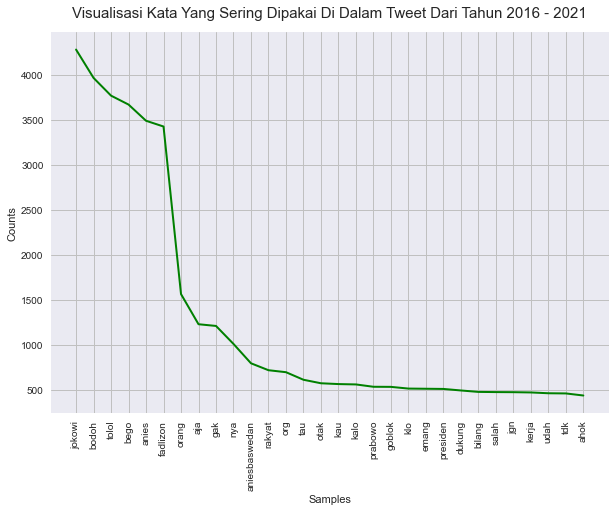

In [44]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(10, 7))
plt.title("Visualisasi Kata Yang Sering Dipakai Di Dalam Tweet Dari Tahun 2016 - 2021", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["g"])))
fqdist_content_all_years.plot(30, cumulative=False)
plt.show()

## 4. Visualisasi Dengan Wordclouds

### Semua Label (Positif & Negatif)

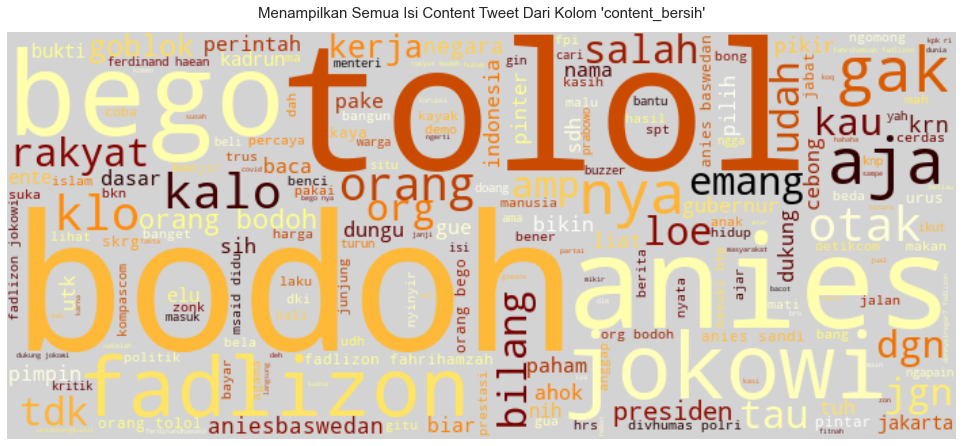

In [21]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data" dari kolom "content_bersih"  
all_tweet_post = " ".join(word for word in data["content_bersih"])
wordcloud = WordCloud(colormap="afmhot", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Tweet Dari Kolom 'content_bersih'", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari visualisasi diatas tampilan tersebut merupakan visualisasi dari wordcloud yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata-kata yang telah diketikkan oleh masyarakat.

Namun tampilan visualisasi diatas masih mencakup semua label (positif & negatif) yang membuat kita kesulitan untuk mengetahui kata-kata mana yang bernilai positif/negatif. Maka dari itu kami akan membuatnya secara terpisah antara visualisasi wordcloud yang bernilai positif dan wordcloud yang bernilai negatif.

### Label Positif 

In [22]:
# Memisahkan semua data yang memiliki label positif yang disesuaikan dari kolom "label"
data_label_positif = data[data.label == "positif"]
data_label_positif.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
5,2016-11-13 17:45:54+00:00,percetakanku iwanfals kalo polling anies mena...,positif,"[percetakanku, iwanfals, kalo, polling, anies,...","[percetakanku, iwanfals, kalo, polling, anies,...","[cetak, iwanfals, kalo, polling, anies, menang...",cetak iwanfals kalo polling anies menang iwan ...
6,2016-10-29 17:42:11+00:00,anies akan masukan dana csr apbd anis bego itu...,positif,"[anies, akan, masukan, dana, csr, apbd, anis, ...","[anies, masukan, dana, csr, apbd, anis, bego, ...","[anies, masuk, dana, csr, apbd, anis, bego, da...",anies masuk dana csr apbd anis bego dana swast...
7,2016-10-29 17:40:58+00:00,anies akan masukan dana csr apbd anis bego itu...,positif,"[anies, akan, masukan, dana, csr, apbd, anis, ...","[anies, masukan, dana, csr, apbd, anis, bego, ...","[anies, masuk, dana, csr, apbd, anis, bego, da...",anies masuk dana csr apbd anis bego dana swast...


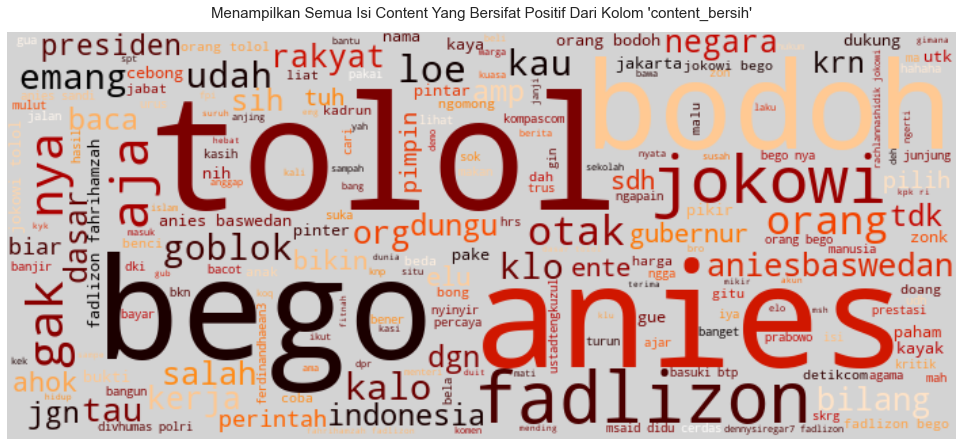

In [23]:
# Memvisualisasikan menggunakan wordcloud dari DataFrame "data_label_positif" dari kolom "content_bersih"  
all_content_positive = " ".join(word for word in data_label_positif["content_bersih"])
wordcloud = WordCloud(colormap="gist_heat", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Content Yang Bersifat Positif Dari Kolom 'content_bersih'", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Label Negatif

In [24]:
# Memisahkan semua data yang memiliki label negatif yang disesuaikan dari kolom "label"
data_label_negatif = data[data.label == "negatif"]
data_label_negatif.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies
12,2016-10-09 09:38:35+00:00,anies bener naik angkutan umum jkt itu mahal k...,negatif,"[anies, bener, naik, angkutan, umum, jkt, itu,...","[anies, bener, angkutan, jkt, mahal, kalo, tau...","[anies, bener, angkut, jkt, mahal, kalo, tau, ...",anies bener angkut jkt mahal kalo tau bego aja...
20,2016-12-29 10:04:37+00:00,takviri gunromli hanya orng bodoh yang percay...,negatif,"[takviri, gunromli, hanya, orng, bodoh, yang, ...","[takviri, gunromli, orng, bodoh, percaya, agus...","[takviri, gunromli, orng, bodoh, percaya, agus...",takviri gunromli orng bodoh percaya agus pimpi...


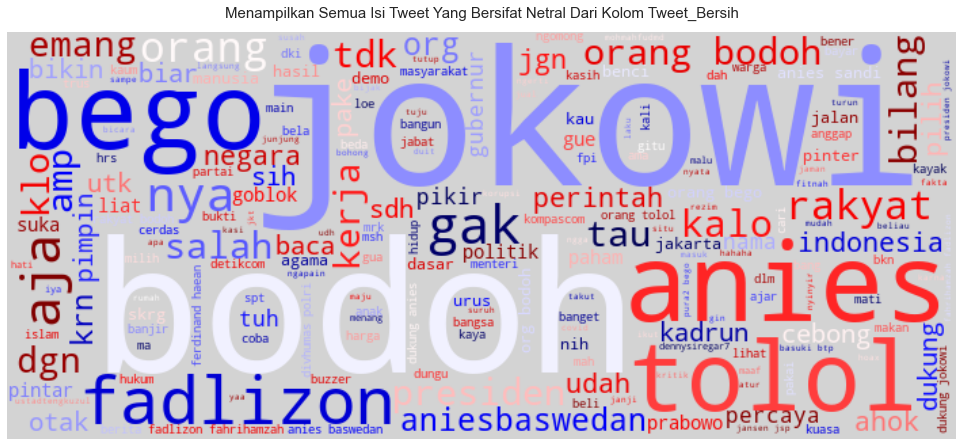

In [25]:
# Membuat Tampilan Visualisasi menggunakan wordcloud dari DataFrame "data_label_negatif" dari kolom "content_bersih" 
all_content_negative = " ".join(word for word in data_label_negatif["content_bersih"])
wordcloud = WordCloud(colormap="seismic", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_content_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Melakukan Pemodelan

In [26]:
# Menampilkan keseluruhan data dari DataFrame "data"
data.head()

,tanggal,content,label,content_tokenizing,content_stopwords,content_stemming,content_bersih
0,2016-12-21 04:36:51+00:00,jakartans bego mending kalo anies ini agus htt...,negatif,"[jakartans, bego, mending, kalo, anies, ini, a...","[jakartans, bego, mending, kalo, anies, agus, ...","[jakartans, bego, mending, kalo, anies, agus, ...",jakartans bego mending kalo anies agus c66jtx7qoz
1,2016-12-19 19:20:46+00:00,kaskus apa anies itu dipikir bego ahok jauh l...,positif,"[kaskus, apa, anies, itu, dipikir, bego, ahok,...","[kaskus, anies, dipikir, bego, ahok, loe, hok]","[kaskus, anies, pikir, bego, ahok, loe, hok]",kaskus anies pikir bego ahok loe hok
2,2016-12-09 11:21:17+00:00,mau debatnya klo bertempat petamburan kali klo...,negatif,"[mau, debatnya, klo, bertempat, petamburan, ka...","[debatnya, klo, bertempat, petamburan, kali, k...","[debat, klo, tempat, tambur, kali, klo, kalah,...",debat klo tempat tambur kali klo kalah debat k...
3,2016-11-24 21:22:09+00:00,bego bngt asu anies sandi uno itu pantes aja d...,positif,"[bego, bngt, asu, anies, sandi, uno, itu, pant...","[bego, bngt, asu, anies, sandi, uno, pantes, a...","[bego, bngt, asu, anies, sandi, uno, pantes, a...",bego bngt asu anies sandi uno pantes aja pecat...
4,2016-11-18 17:40:30+00:00,sam arif kalo orang tidak bego dan tidak tol...,negatif,"[sam, arif, kalo, orang, tidak, bego, dan, tid...","[sam, arif, kalo, orang, bego, tolol, milih, a...","[sam, arif, kalo, orang, bego, tolol, milih, a...",sam arif kalo orang bego tolol milih ahy anies


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah pembobotan nilai yang bernama TF-IDF (term frequency-inverse document frequency). Pembobotan dengan TF-IDF merupakan salah satu faktor pembobotan yang sering digunakan dalam konteks penambangan data yang bersifat full text. Selain itu TF-IDF juga dapat dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [27]:
# Melakukan proses pembobotan nilai dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_tfidf = tfidf.fit_transform(data["content_bersih"].astype("U"))
data_tfidf

<9693x23585 sparse matrix of type '<class 'numpy.float64'>'
	with 156012 stored elements in Compressed Sparse Row format>

In [28]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_tfidf, data["label"], test_size=0.2, random_state=20)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split:

1. data_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "content_bersih"
2. data: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "label" dari masing-masing nilai sentimen
3. test_size: Nilai presentase dari sebuah ukuran untuk membagi data test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari data test mencapai 20% dan data train mencapai 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

Setelah melakukan proses split yaitu membagi keutuhan data menjadi 2 bagian (data test & data train) langkah selanjutnya adalah melakukan pemodelan dengan menggunakan model multinomial naive bayes atau yang biasa dikenal sebagai MultinomialNB. Multinomial naive bayes merupakan sebuah teknik turunan dari naive bayes yang menggunakan teknik yang bernama conditional probability yaitu sebuah teknik yang dapat dilakukan dengan menggunakan frekuensi kemunculan suatu kata pada suatu kelas

In [29]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_train = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb_train = GridSearchCV(model_mnb_train, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_train.fit(x_train, y_train)

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

Penjelasan dari poin-poin yang ada di codingan diatas:
1. Parameters merupakan sebuah teknik pemanggilan fungsi-fungsi yang menjadi bagian dari sebuah model itu sendiri. Untuk mengecek parameter dari setiap model bisa dicek pada website sckit-learn. Pada codingan diatas, fungsi alpha dan fit_prior merupakan bagian dari parameter MultinomialNB. 
2. GridSearchCV merupakan sebuah teknik untuk mencari best paramater/parameter terbaik untuk kasus klasifikasi. Pada codingan diatas, teknik GridSearchCV saya gunakan untuk memanggil variabel model dari MultinomialNB (model_mnb), fungsi serta nilai dari paramater model MultinomialNB, dan fungsi cross validation yang bernilai 30.
3. Cross Validation merupakan sebuah metode yang biasa dipakai dalam pengujian data mining yang bertujuan untuk memperoleh hasil akhir yang optimal. Metode ini akan menilai dengan cara mengestimasi rotasi yang hasil statistik analisisnya akan menggeneralisasi kumpulan data yang bersifat independen.
4. .fit merupakan sebuah fungsi yang bertujuan untuk melatih model dengan data training.

Namun setelah melakukan proses pemodelan untuk data train, saya juga akan melakukan pemodelan untuk data latih (test) supaya hasil akurasi yang di dapatkan tidak mengalami overfitting.

In [30]:
"""
Karena pada langkah sebelumnya sudah melakukan pemanggilan model Multinomial Naive Bayes terhadap data train (latih) selanjutnya
adalah melakukan pemanggilan model Multinomial Naive Bayes untuk data latih
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb_test = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
}

grid_search_mnb_test = GridSearchCV(model_mnb_test, parameters, cv=30) # CV = Cross Validation

grid_search_mnb_test.fit(x_test, y_test) # Melatih model MultinomialNB dengan data latih supaya tidak terjadi imbalanced

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [31]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Data Uji---------------------------------")
prediction_test = grid_search_mnb_train.predict(x_test)
print(prediction_test)

print()

print("----------------------Prediksi Dari Data Latih---------------------------------")
prediction_train = grid_search_mnb_test.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Data Uji---------------------------------
['positif' 'positif' 'positif' ... 'positif' 'positif' 'positif']

----------------------Prediksi Dari Data Latih---------------------------------
['positif' 'negatif' 'positif' ... 'positif' 'positif' 'positif']


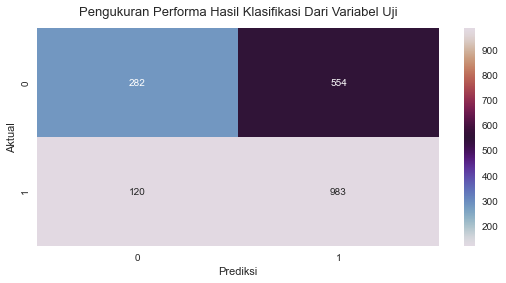

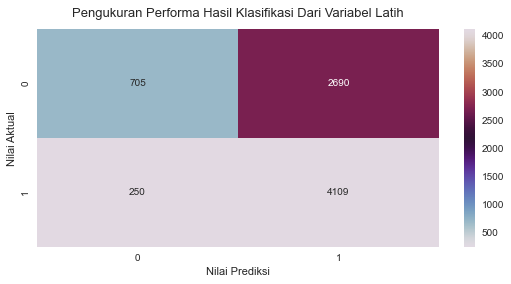

In [32]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="twilight", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="twilight", fmt=".0f", ax=ax)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Nilai Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

Penjelasan dari visualisasi pada confusion matrix:
- Data Test
1. True Positive pada data test memiliki nilai sejumlah 282. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data test memiliki nilai sejumlah 983. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data test memiliki nilai sejumlah 554. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data test memiliki nilai sejumlah 120. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

- Data Train
1. True Positive pada data train memiliki nilai sejumlah 705. True Positive merupakan data yang bernilai positif yang diprediksi tepat.
2. True Negative pada data train memiliki nilai sejumlah 4109. True Negative sendiri merupakan data yang bernilai negatif yang diprediksi secara tepat.
3. False Positive pada data train memiliki nilai sejumlah 2690. False Positive sendiri merupakan data yang bernilai negatif namun pada saat diprediksi terhitung sebagai data positif.
4. False Negative pada data train memiliki nilai sejumlah 250. False Negative sendiri merupakan data yang bernilai positif namun pada saat diprediksi terhitung sebagai data yang negatif.

In [33]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.70      0.34      0.46       836
     positif       0.64      0.89      0.74      1103

    accuracy                           0.65      1939
   macro avg       0.67      0.61      0.60      1939
weighted avg       0.67      0.65      0.62      1939

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.74      0.21      0.32      3395
     positif       0.60      0.94      0.74      4359

    accuracy                           0.62      7754
   macro avg       0.67      0.58      0.53      7754
weighted avg       0.66      0.62      0.56      7754



## 6. Membuat Prediksi Akhir & Visualisasi Tahap Akhir

In [34]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data test
content_output_test_all_years = pd.DataFrame({"label": prediction_test})
content_output_test_all_years.head()

,label
0,positif
1,positif
2,positif
3,positif
4,positif


In [35]:
# Membuat variabel baru yang dihasilkan dari prediksi label content sentimen terhadap data test
content_output_train_all_years = pd.DataFrame({"label": prediction_train})
content_output_train_all_years.head()

,label
0,positif
1,negatif
2,positif
3,negatif
4,negatif


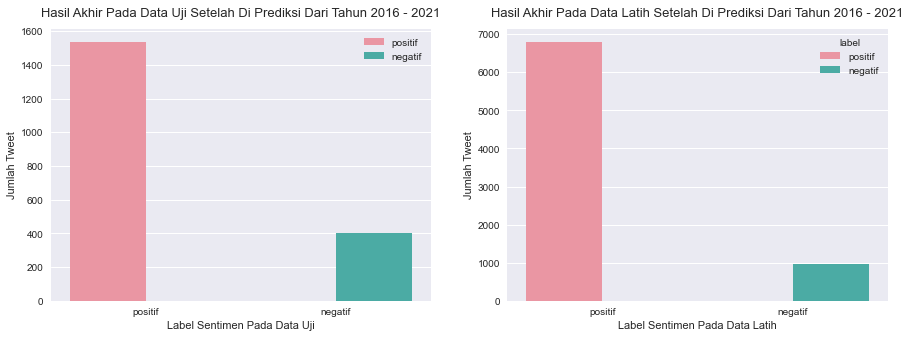

In [36]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari data test & data train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="label", hue="label", data=content_output_test_all_years)
plt.title("Hasil Akhir Pada Data Uji Setelah Di Prediksi Dari Tahun 2016 - 2021", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="label", hue="label", data=content_output_train_all_years)
plt.title("Hasil Akhir Pada Data Latih Setelah Di Prediksi Dari Tahun 2016 - 2021", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Label Sentimen Pada Data Latih")
plt.ylabel("Jumlah Tweet")
plt.show()

Penjelasan dari bar plot sebagai berikut:

- Variabel content_output_test_all_years
1. Pada variabel content_output_test_all_years dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 1537. Sedangkan pada nilai label "negatif" di variabel content_output_test_all_years memiliki jumlah nilai isi content tweet sebanyak 402. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "positif" lebih banyak daripada nilai label "negatif" yang memiliki selisih nilai sebanyak 1135 nilai.

- Variabel content_output_train_all_years
1. Pada variabel content_output_train_all_years dengan nilai label "positif" memiliki jumlah akhir isi content tweet sebanyak 6799. Sedangkan pada nilai label "negatif" di variabel content_output_train_all_years memiliki jumlah nilai isi content tweet sebanyak 955. Jadi dapat disimpulkan bahwasanya jumlah akhir setelah dilakukan klasifikasi nilai label "positif" lebih banyak daripada nilai label "negatif" yang memiliki selisih nilai sebanyak 5844 nilai.